In [3]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import calendar
import csv

In [ ]:
# Load csv File
df = {'id': [], 'time': [], 'gl': []}

with open('../raw_data/Anderson2016_processed.csv') as file:
    reader = csv.reader(file, delimiter=',')
    for row in reader:
        # check for NAs
        if 'NA' in row:
            continue
        
        if row[0] == 'id': # exclude row with column names
            continue
            
        df['id'].append(row[0]) # add current row's id
        dt = datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') # convert timestamps to datetime format so graphs dont break
        df['time'].append(dt)
        df['gl'].append(float(row[2])) # Convert glucose levels to floats

df = pd.DataFrame(df)
df

In [12]:
# sort by time
sorted_df = pd.DataFrame(df.sort_values(by = ["time"])).reset_index()
sorted_df

,index,id,time,gl
0,697379,30,2011-12-23 08:26:11,112.0
1,697380,30,2011-12-23 08:30:56,111.0
2,697381,30,2011-12-23 08:35:56,112.0
3,697382,30,2011-12-23 08:40:56,117.0
4,697383,30,2011-12-23 08:45:56,124.0
...,...,...,...,...
1302451,1270139,7,2015-06-30 12:39:21,191.0
1302452,1270140,7,2015-06-30 12:44:21,187.0
1302453,1270141,7,2015-06-30 12:49:21,183.0
1302454,1270142,7,2015-06-30 12:54:21,182.0


In [13]:
# # Raw plot of sort by time
# x = sorted_df.time
# y = sorted_df.gl

# fig, ax = plt.subplots(figsize = (12,4), dpi = 300)
# ax.plot(x, y)
# plt.title("Anderson")
# plt.xlabel("Date")
# plt.ylabel("Glucose Level")

# fig.autofmt_xdate() # slant x-axis
# plt.show()

In [14]:
# # group by day
# dates = []
# for time in sorted_df.time:
#     if [time.day, time.month, time.year] not in dates:
#         dates.append([time.day, time.month, time.year])

In [15]:
# # get segments by month
# segments = []
# group = {'id': [], 'time': [], 'gl': []}

# i = 0
# for date in dates:
#     while i < len(sorted_df):
#         if sorted_df.time[i].day == date[0] and sorted_df.time[i].month == date[1] and sorted_df.time[i].year == date[2]:
#             group['id'].append(sorted_df.id[i])
#             group['time'].append(sorted_df.time[i])
#             group['gl'].append(sorted_df.gl[i])
#         else:
#             break
#         i += 1
    
#     segments.append(pd.DataFrame(group).reset_index())
#     group = {'id': [], 'time': [], 'gl': []}

# print(segments)

In [16]:
# # Plot same month segment
# for segment in segments:
#     x = segment.time
#     y = segment.gl
    
#     fig, ax = plt.subplots(figsize = (32,5), dpi = 300)
#     ax.plot_date(x, y)
#     plt.title(f"{segment['time'][0].strftime('%b')} {segment.time[0].day}, {segment.time[0].year}")
#     plt.xlabel("Date")
#     plt.ylabel("Glucose Level")
    
#     fig.autofmt_xdate() # slant x-axis
#     plt.show()

In [17]:
# Grouping data by ID
IDs = []
for ID in df.id:
    if ID not in IDs:
        IDs.append(ID)

# Group Subject Data
subj_data = dict()
for ID in IDs:
    subj_data[ID] = df.loc[df['id'] == ID].reset_index()

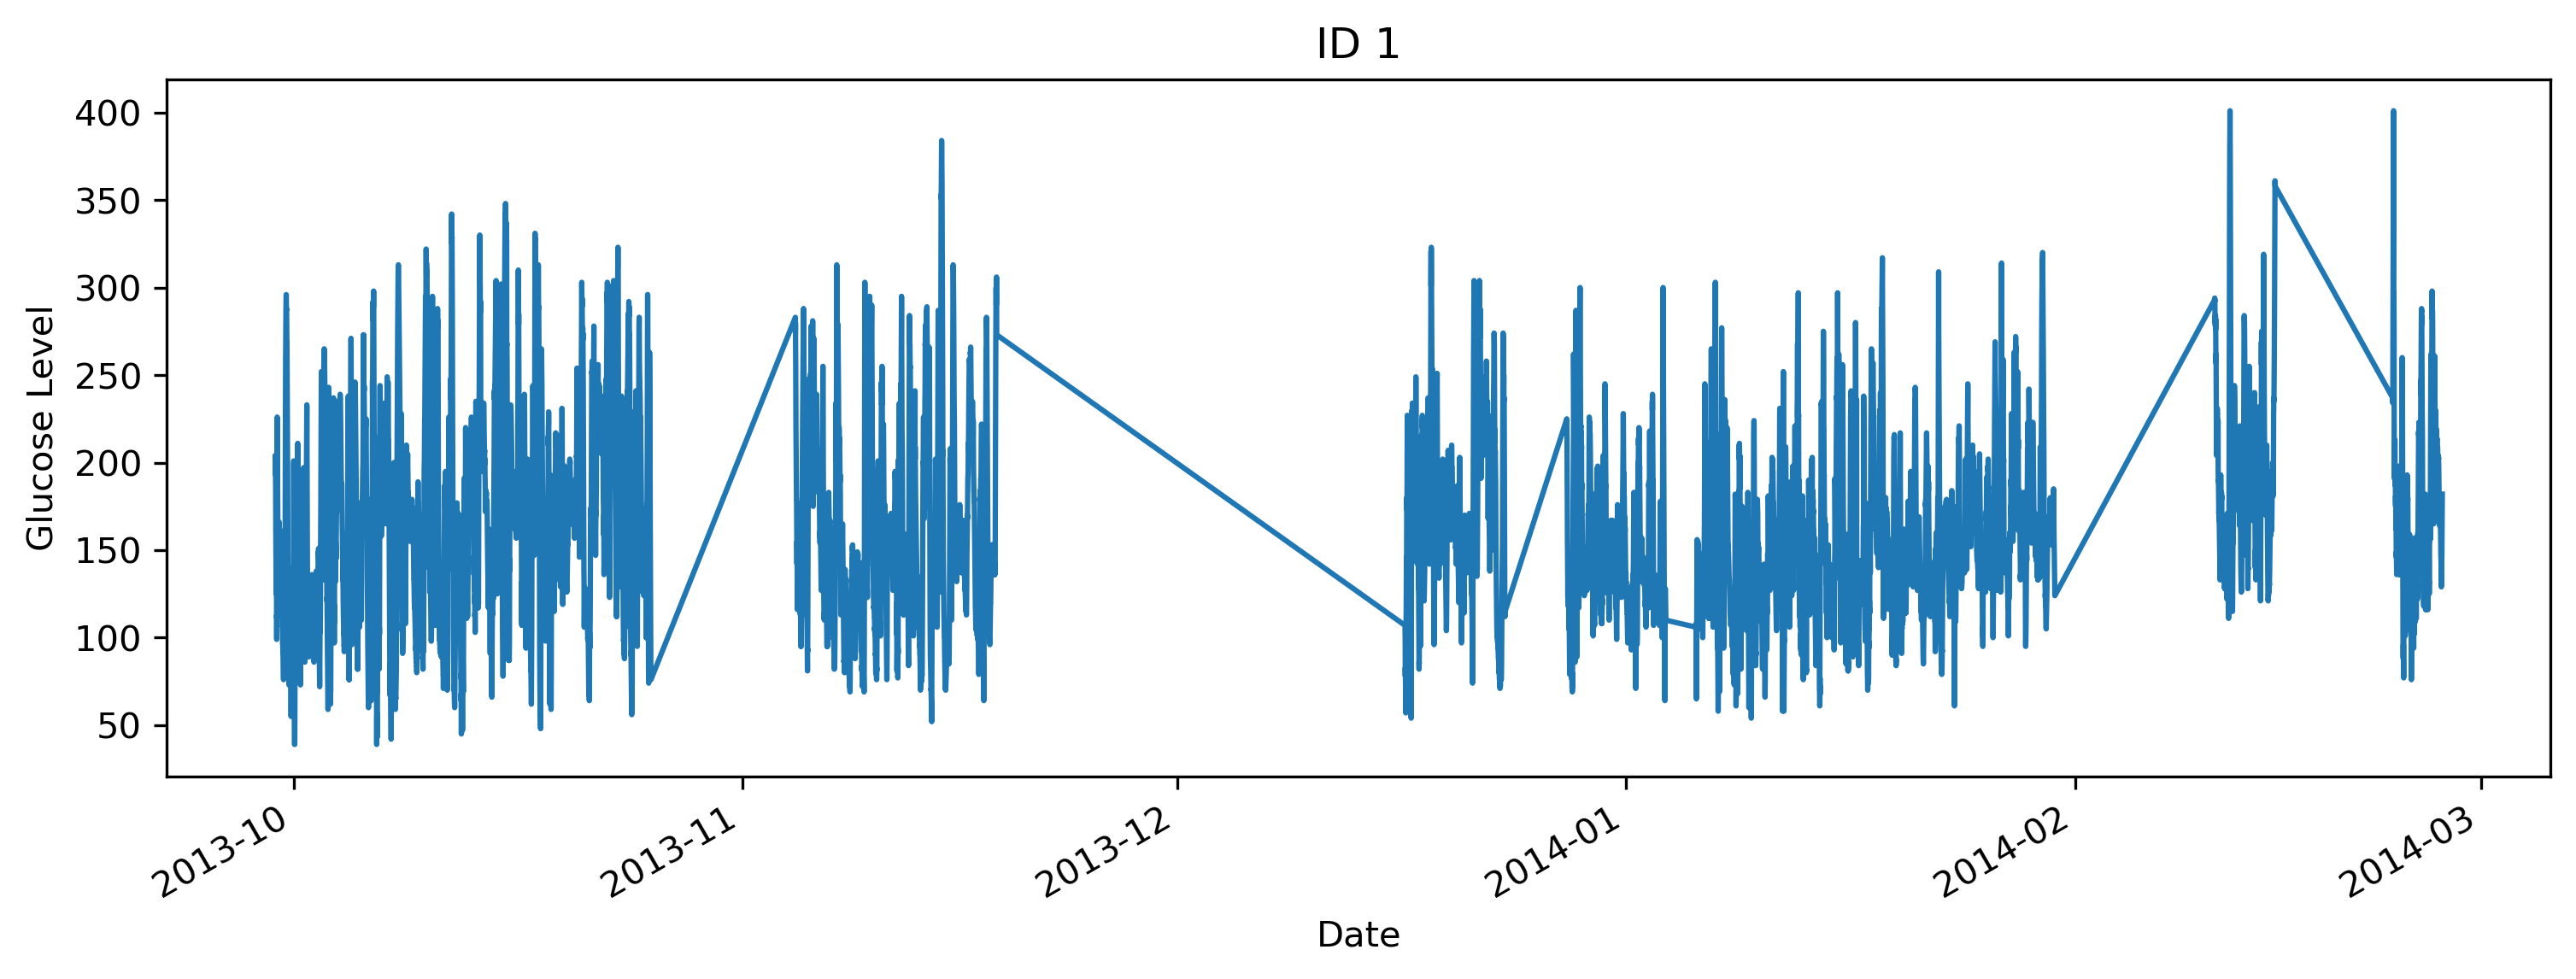

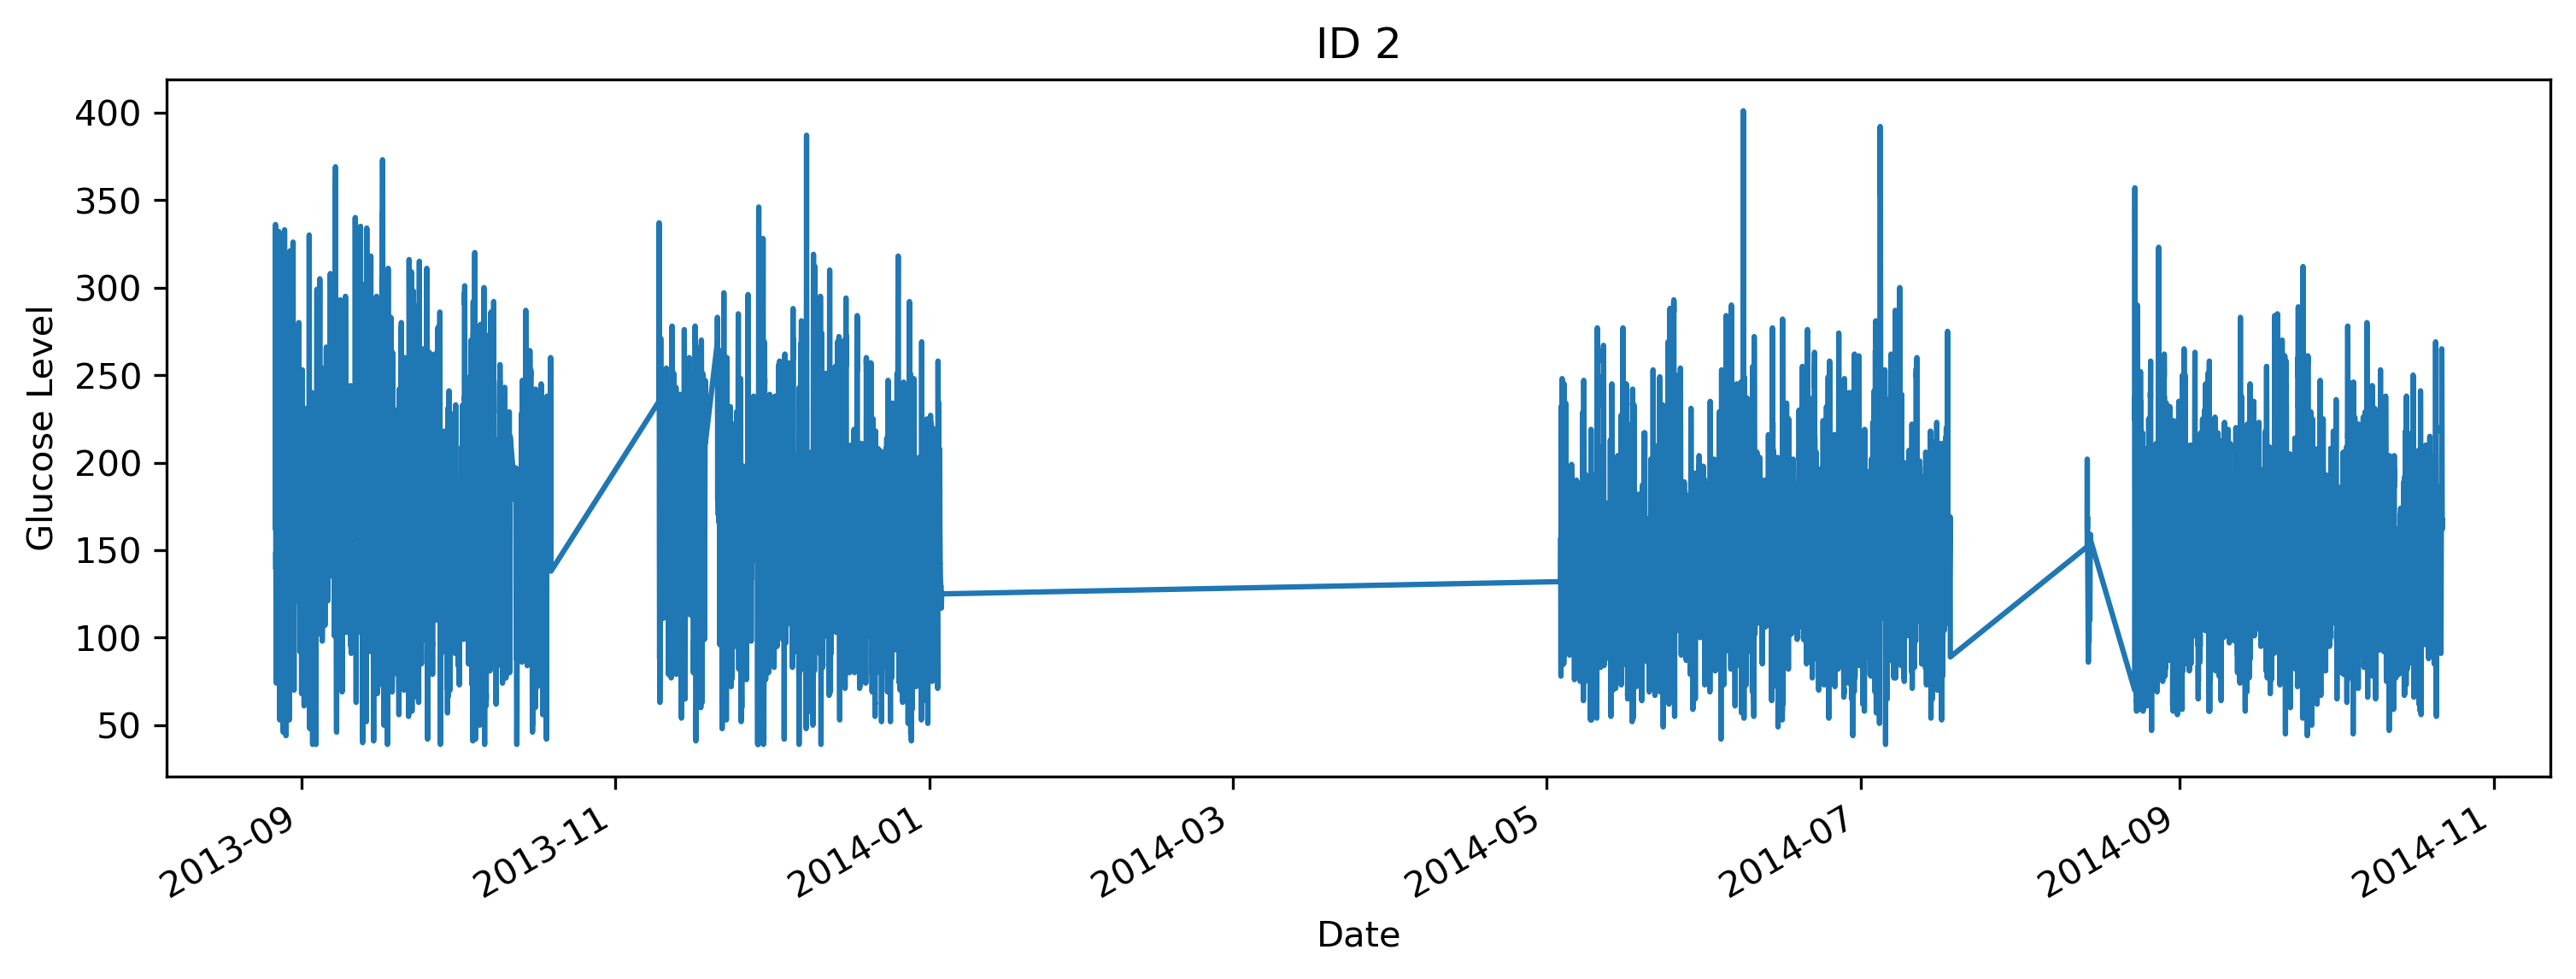

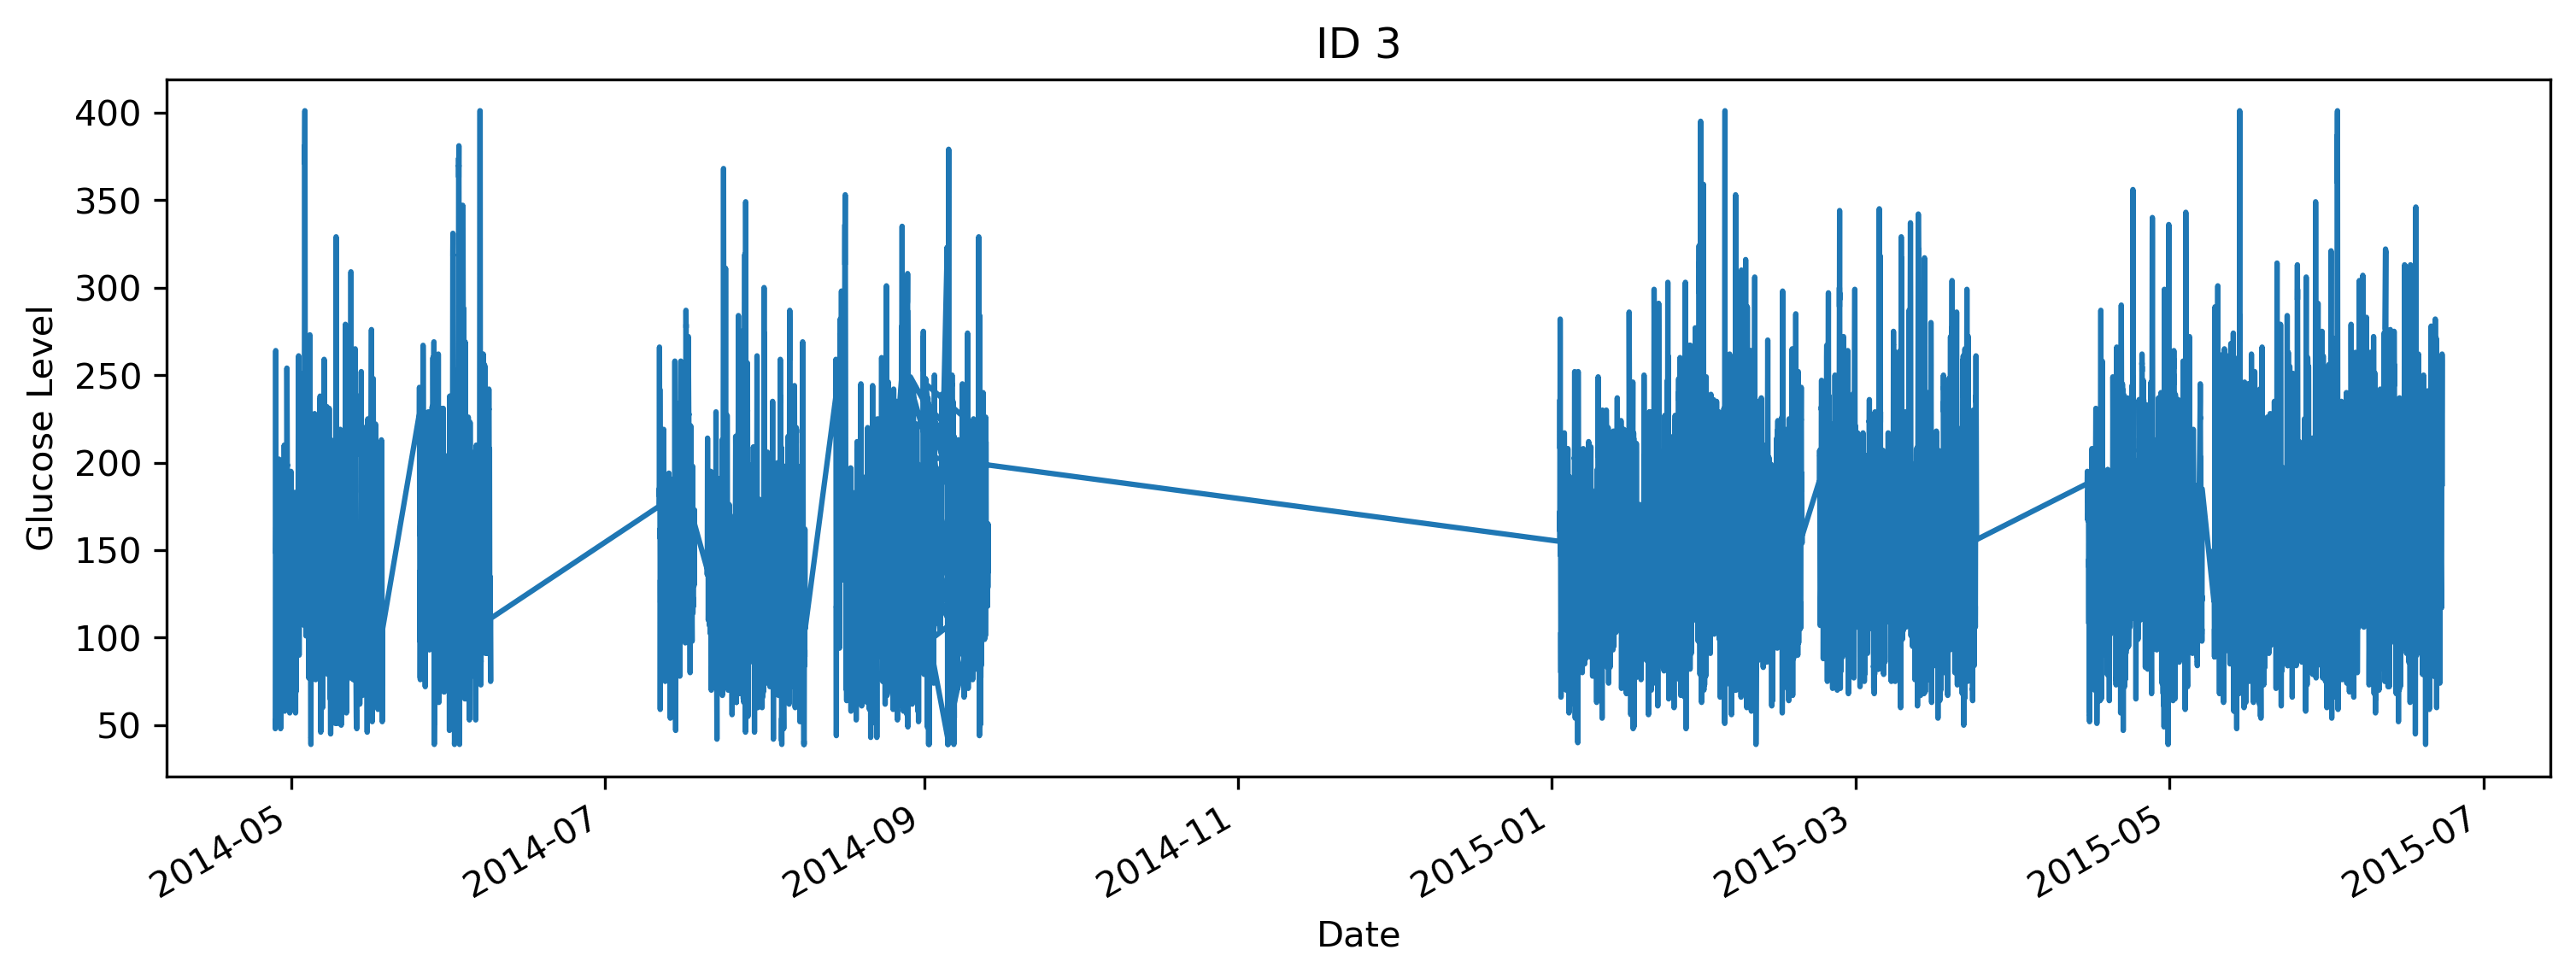

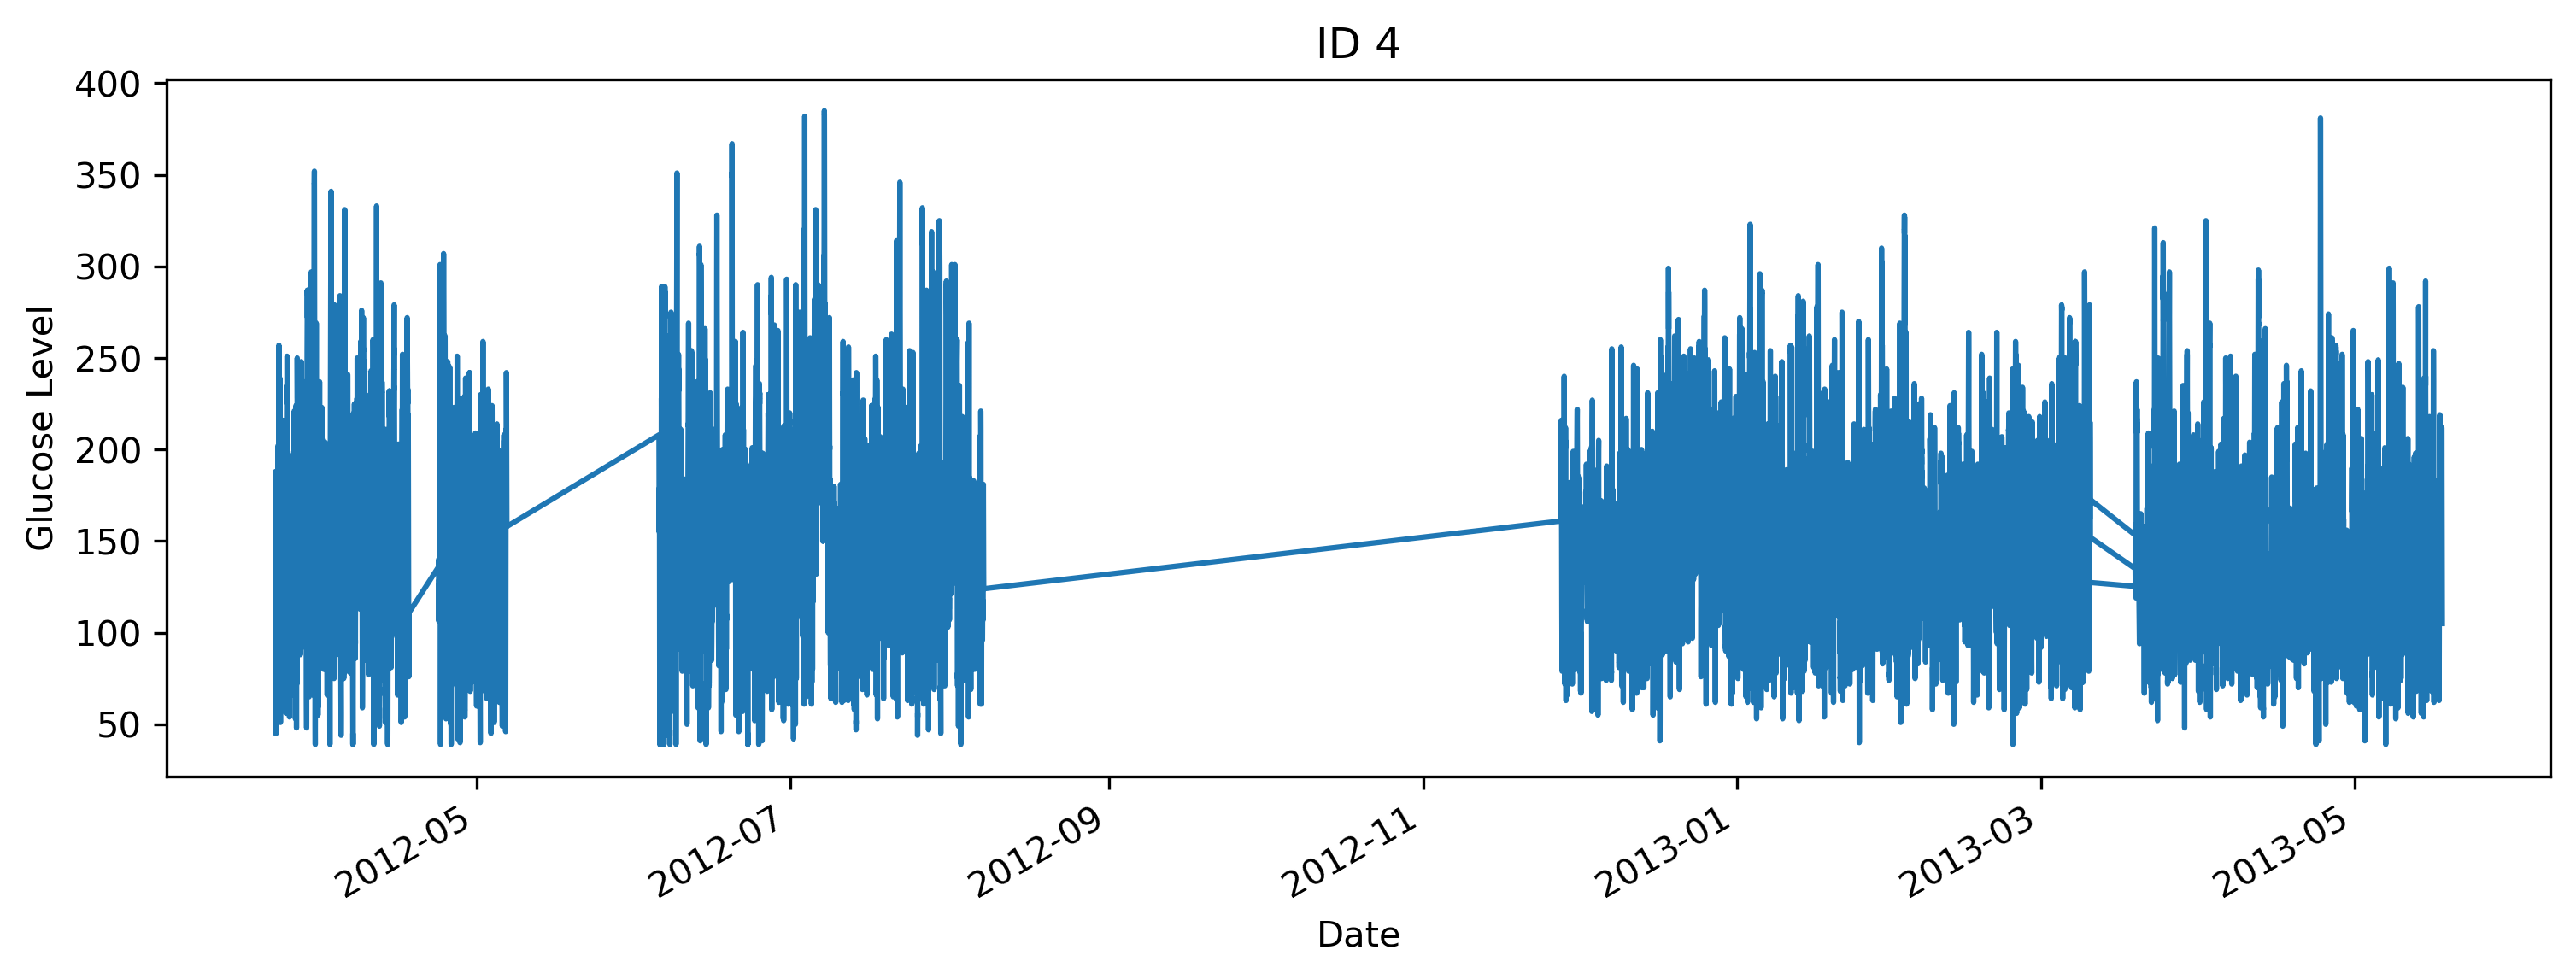

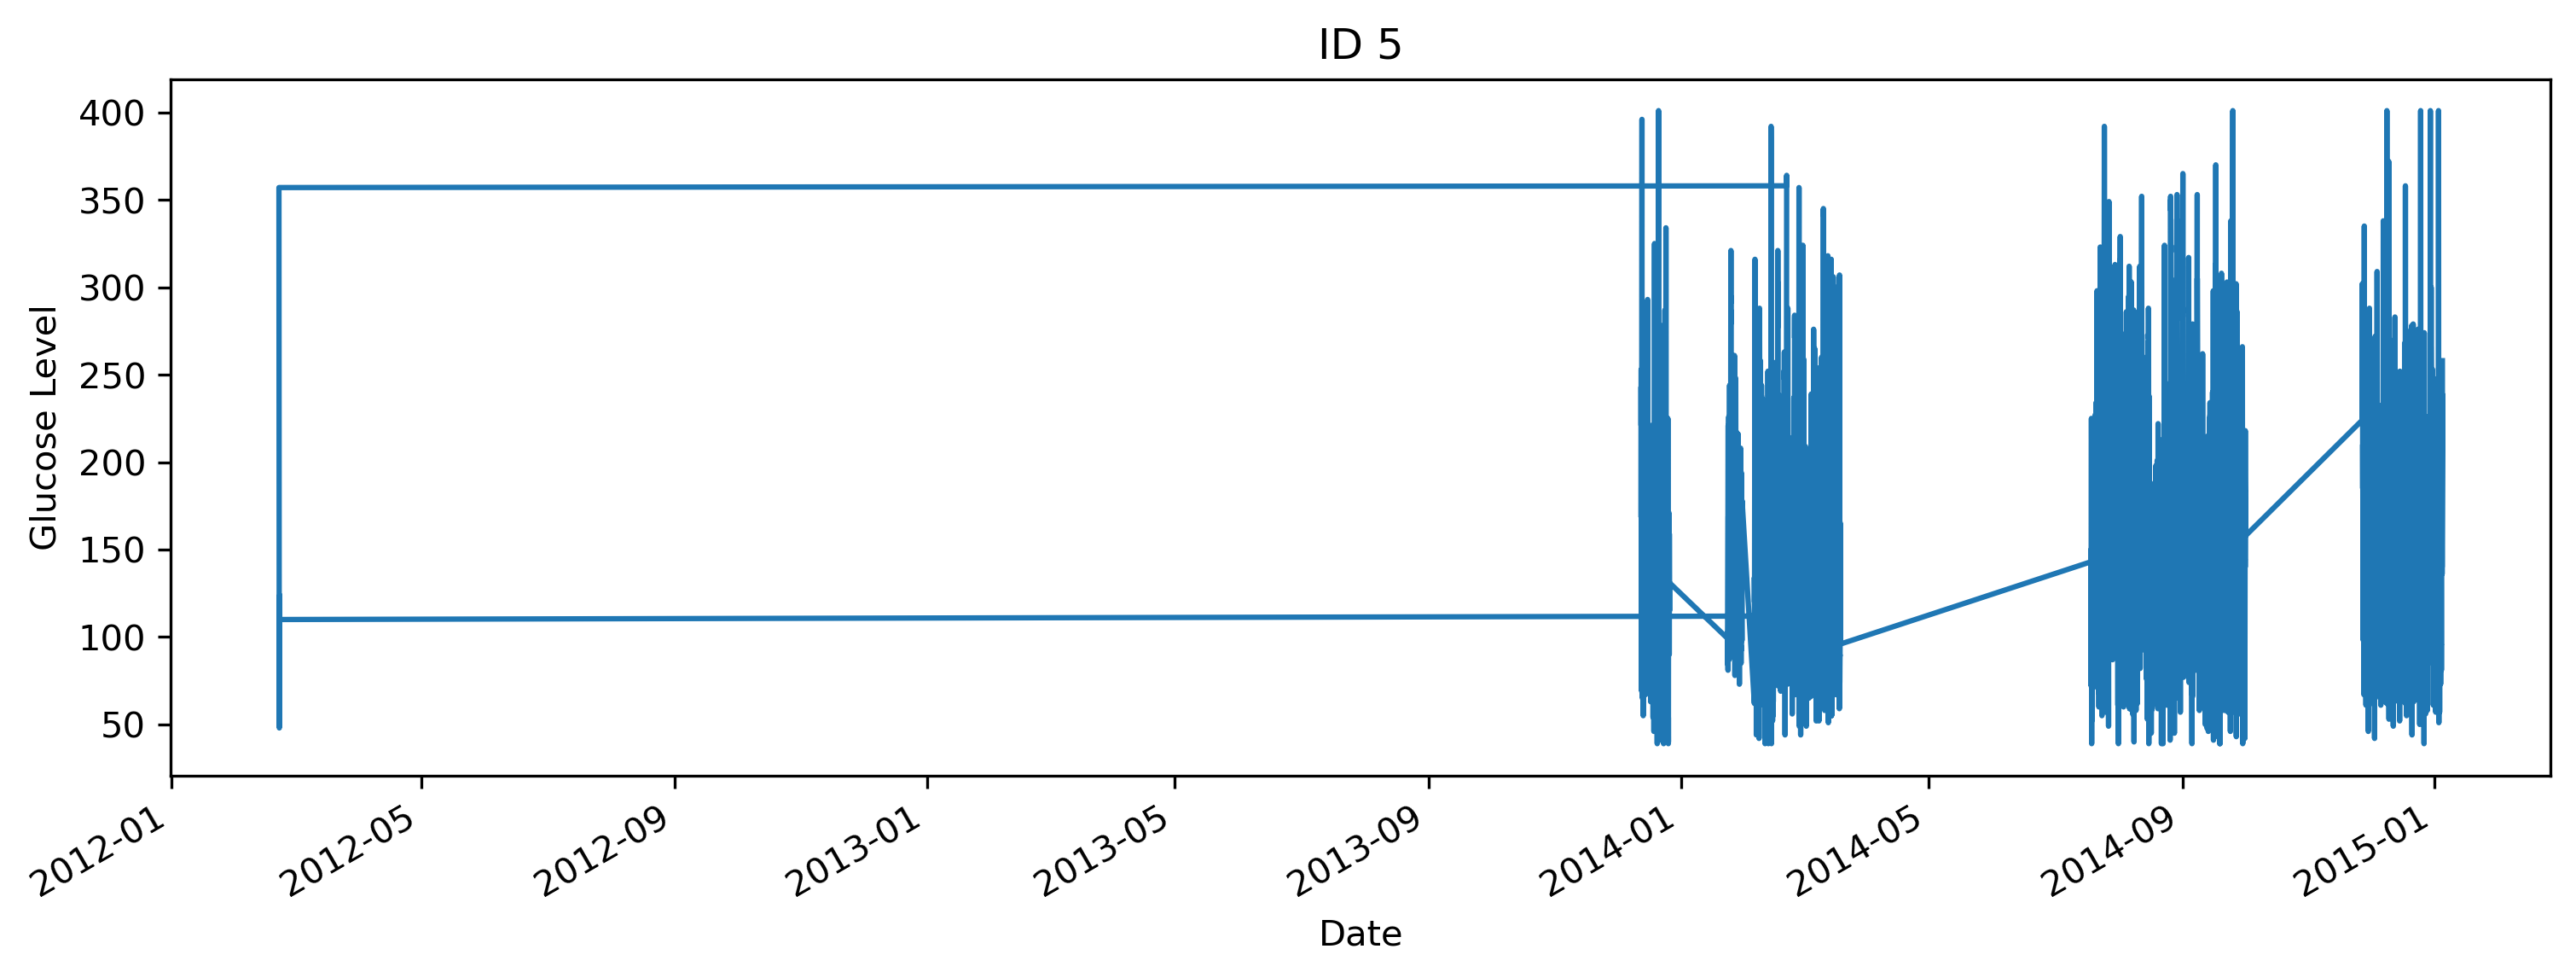

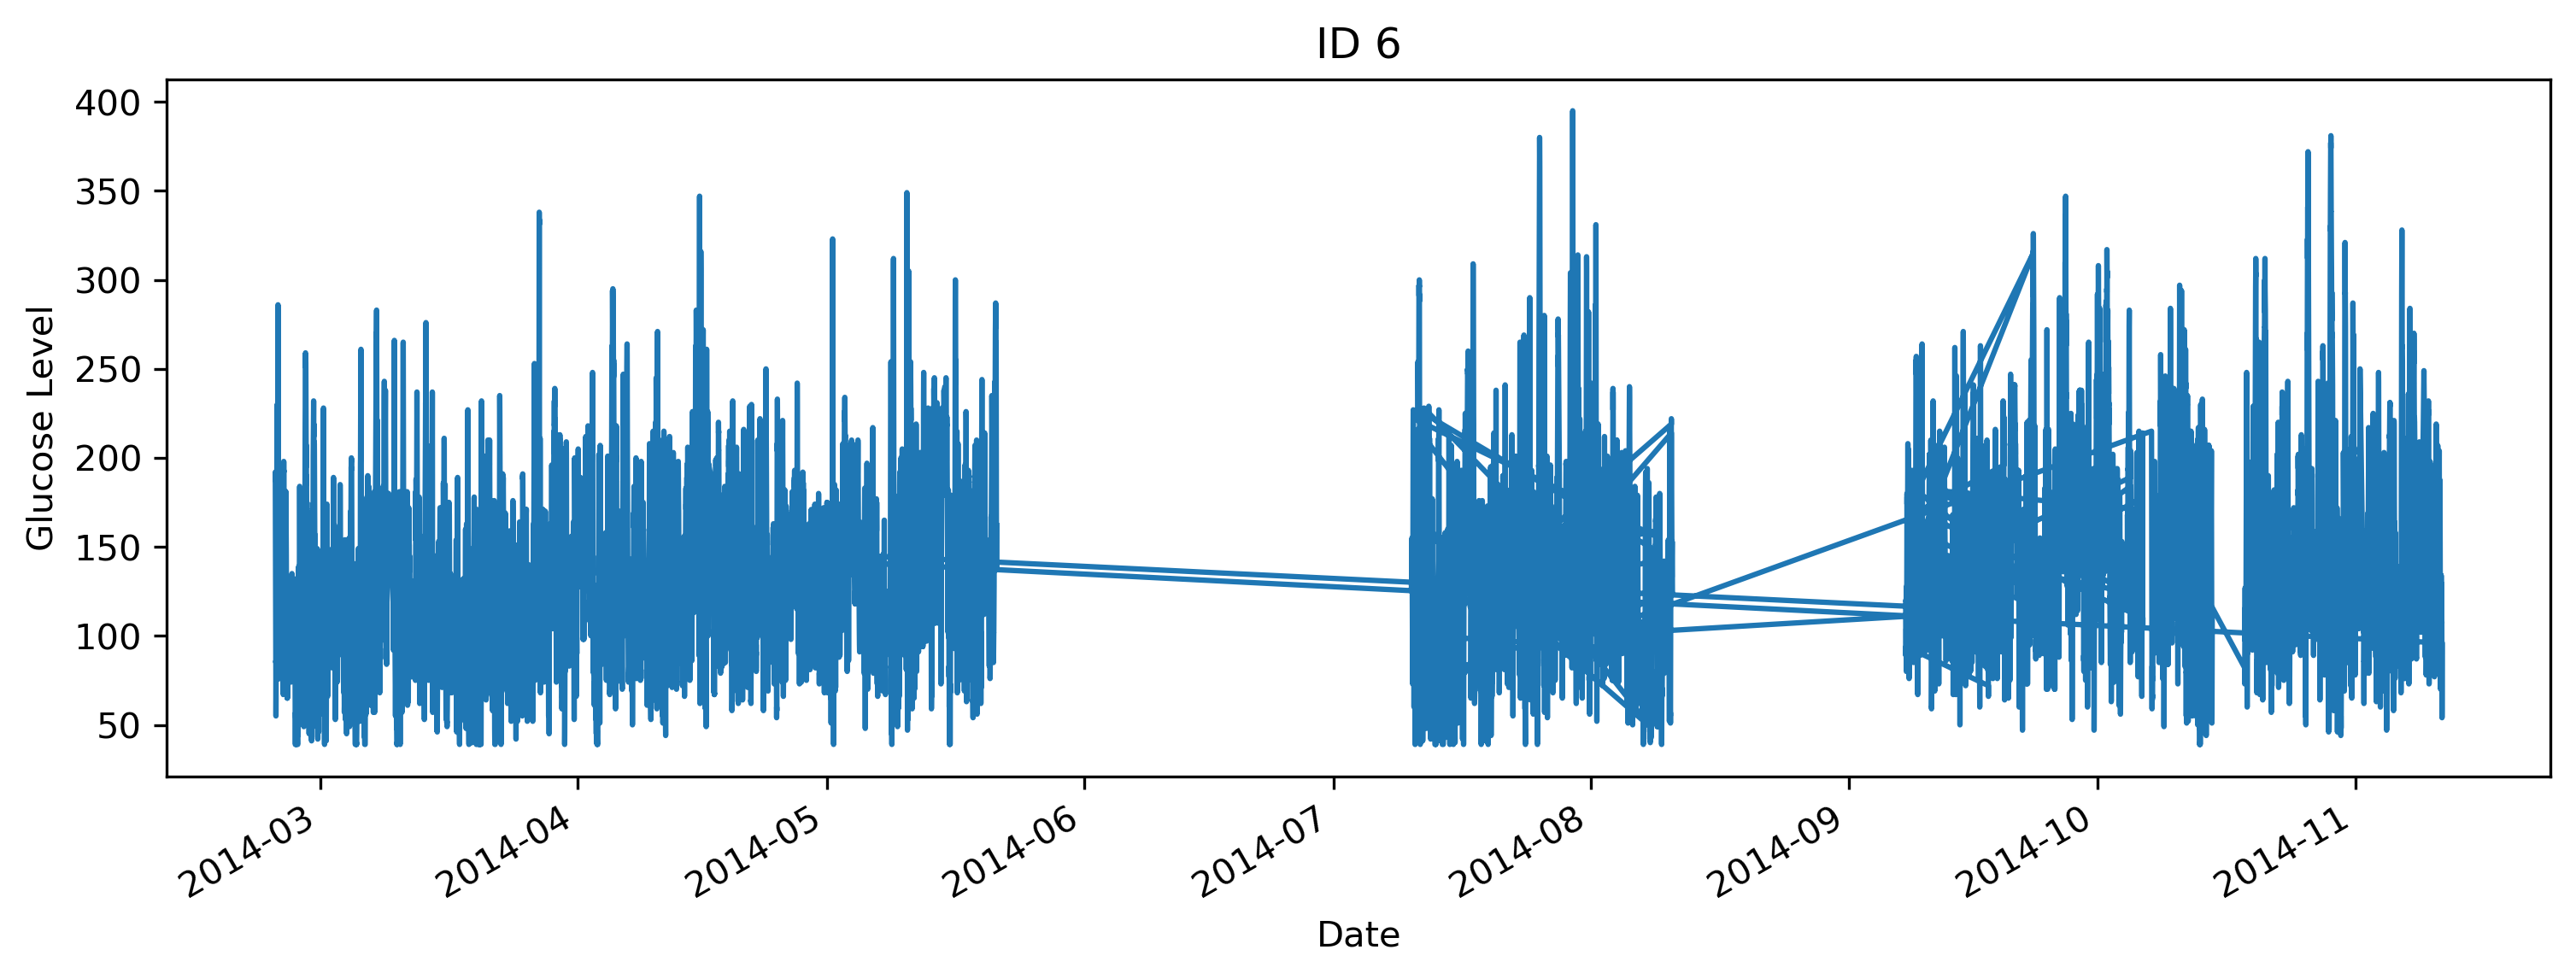

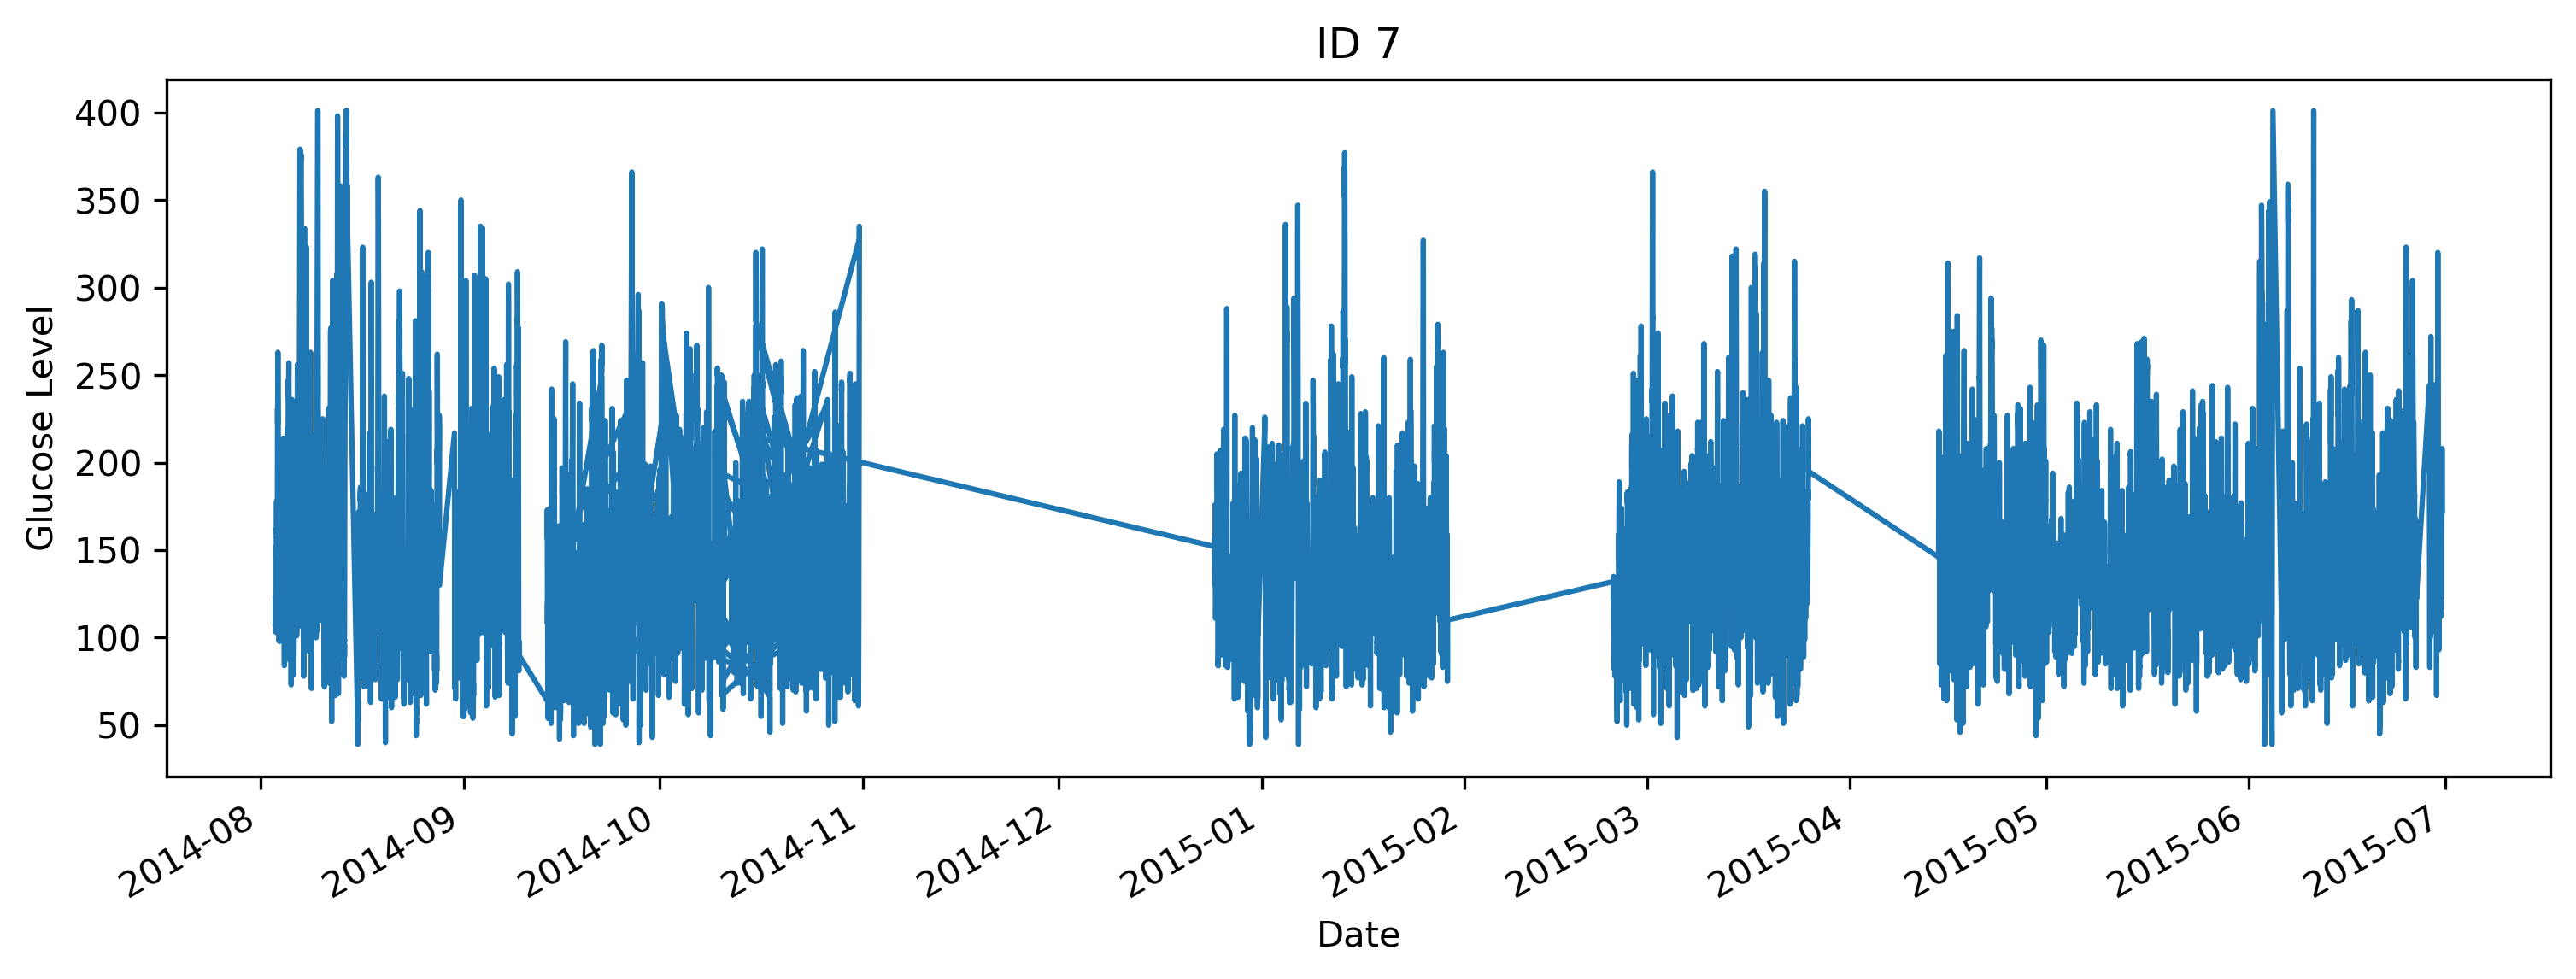

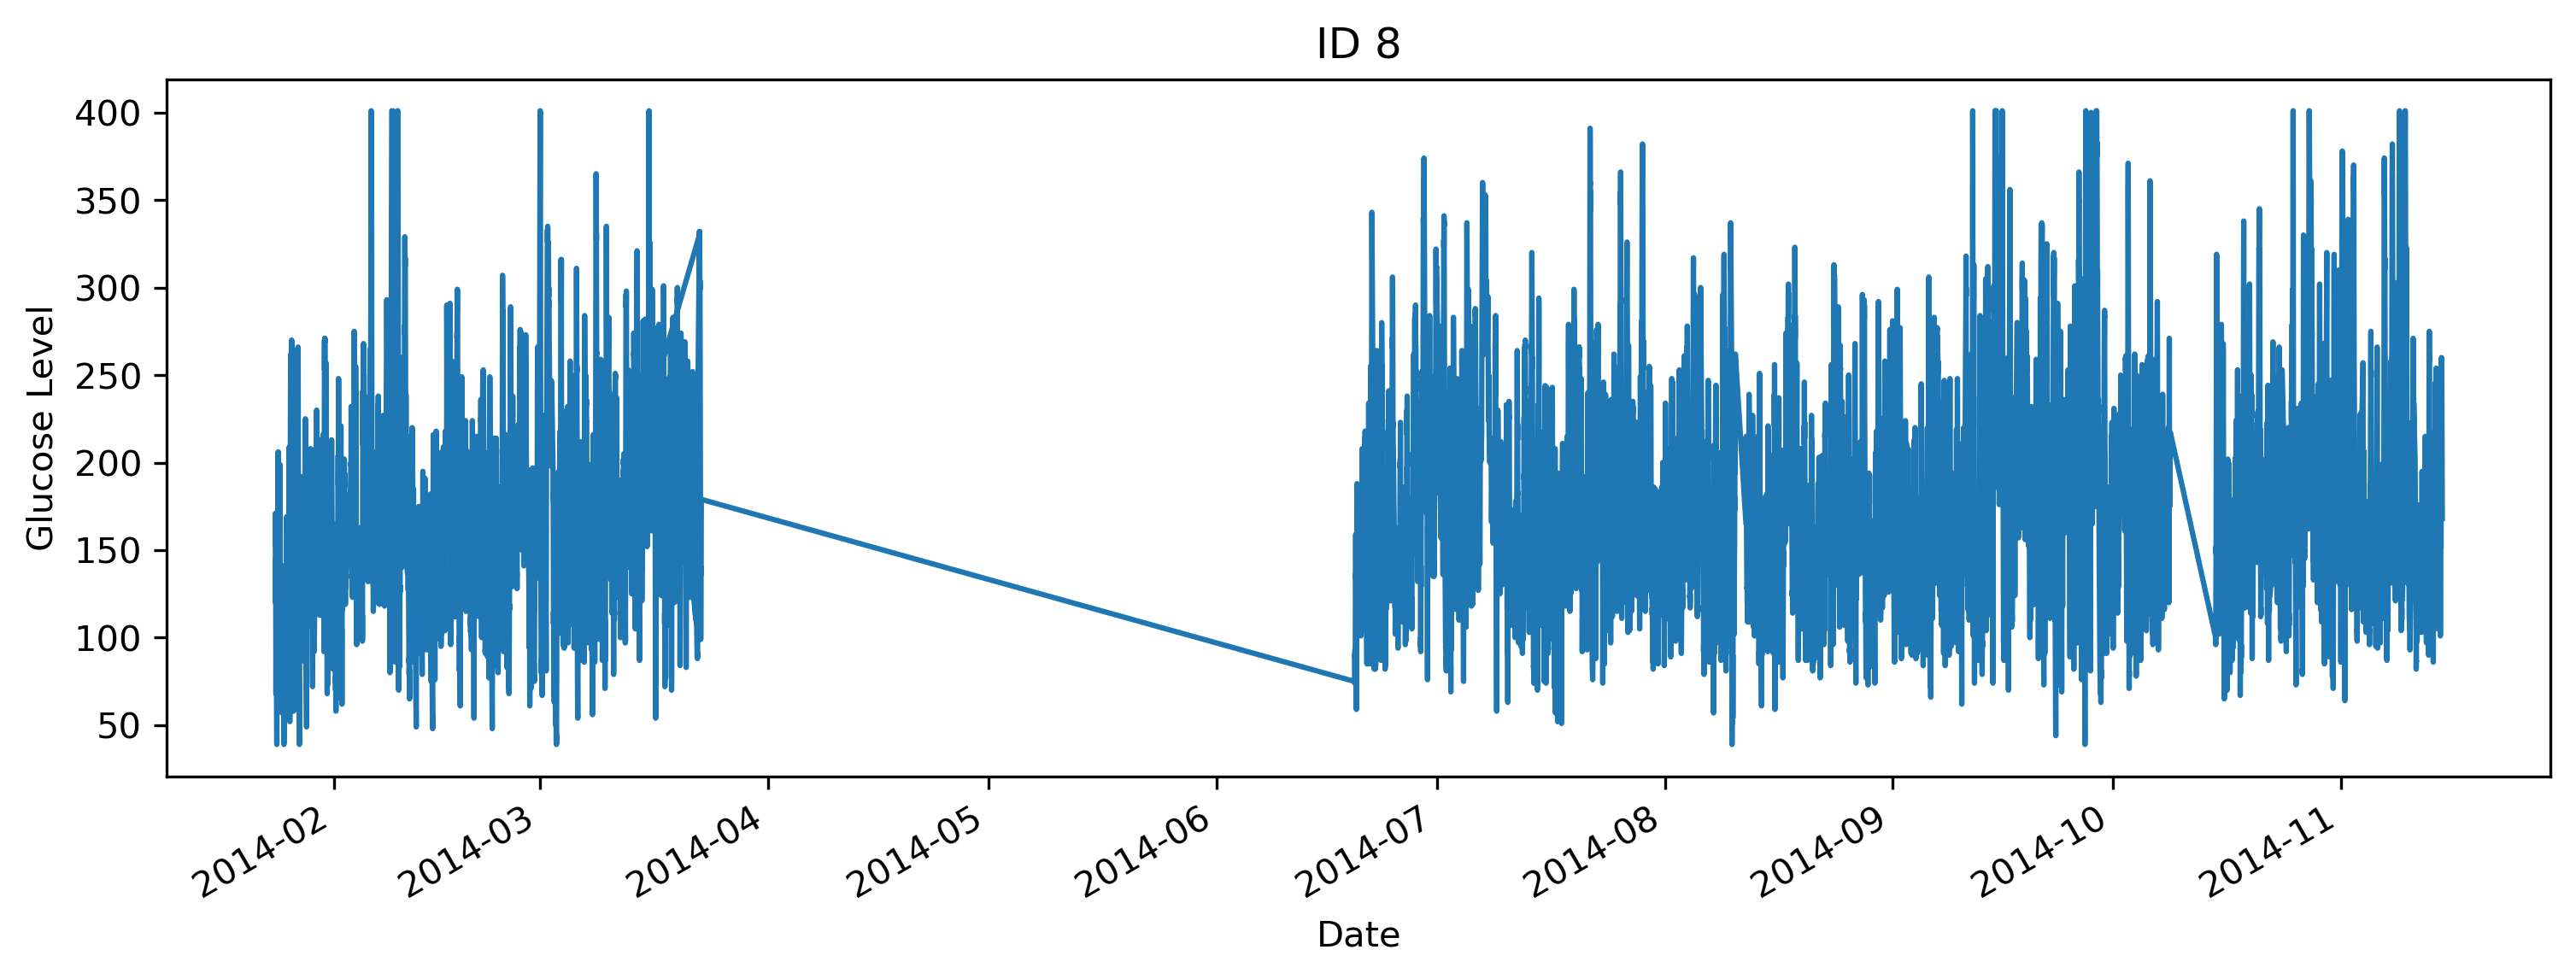

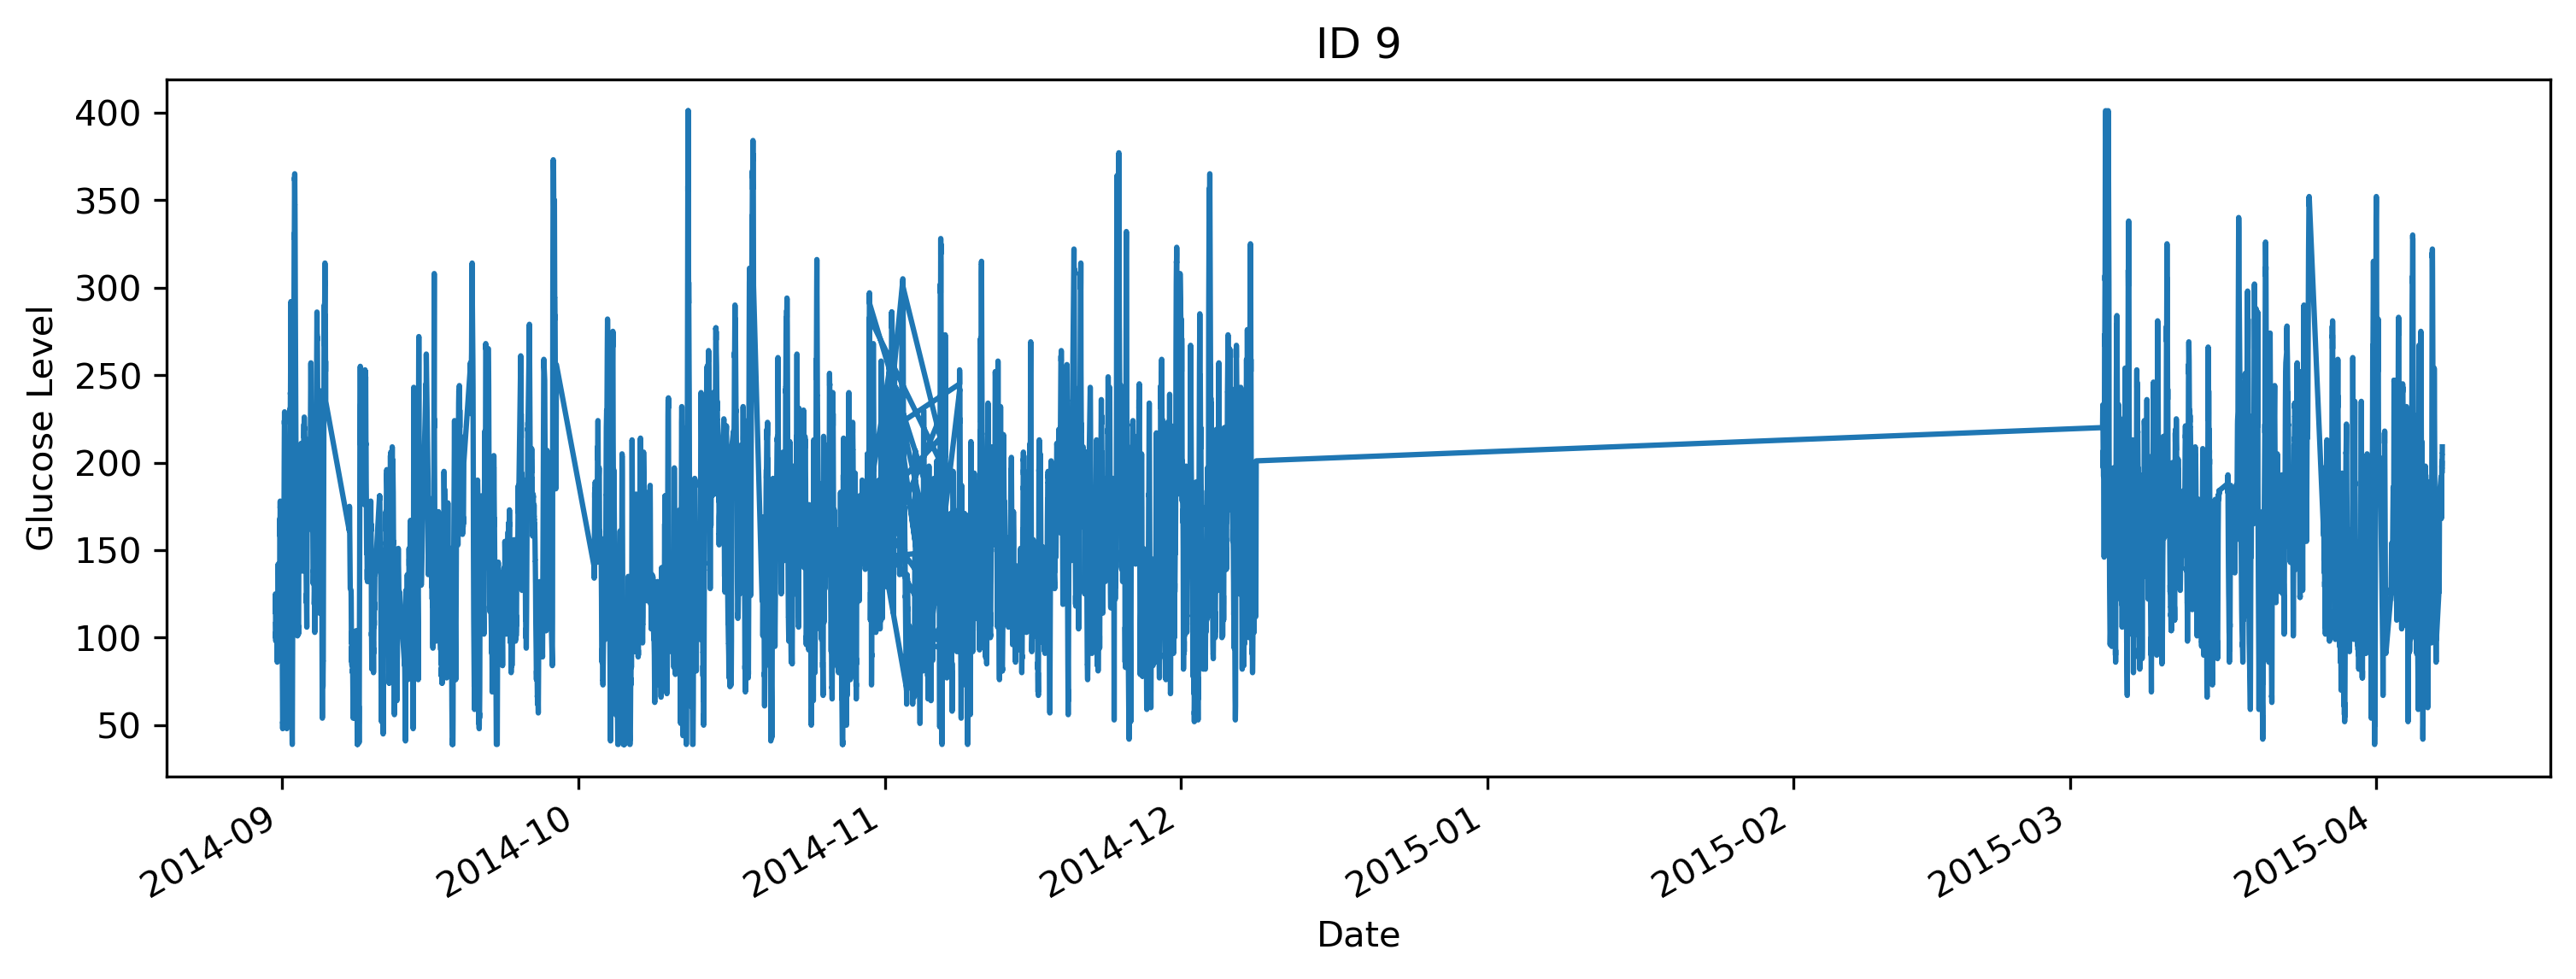

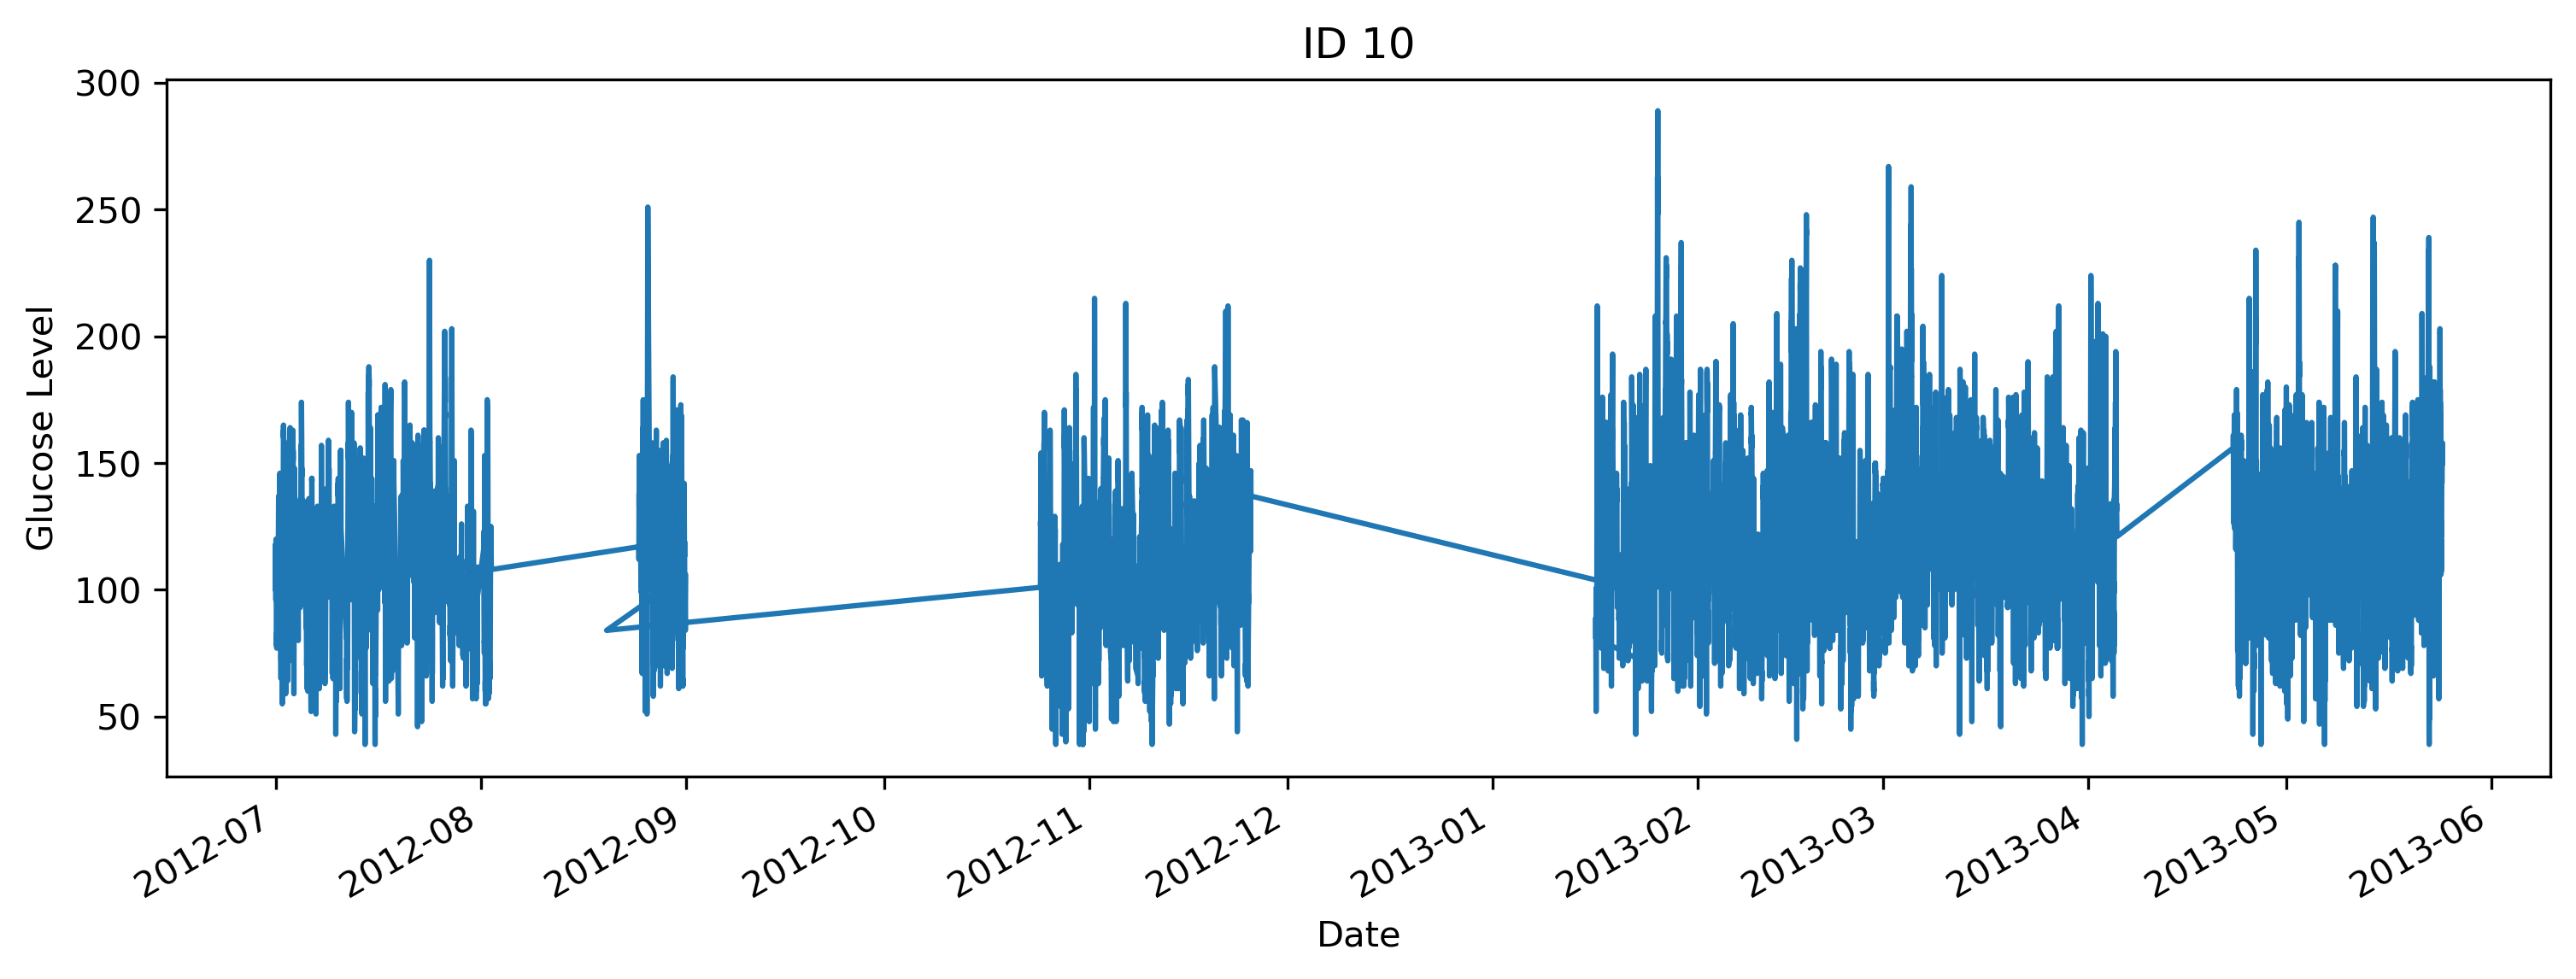

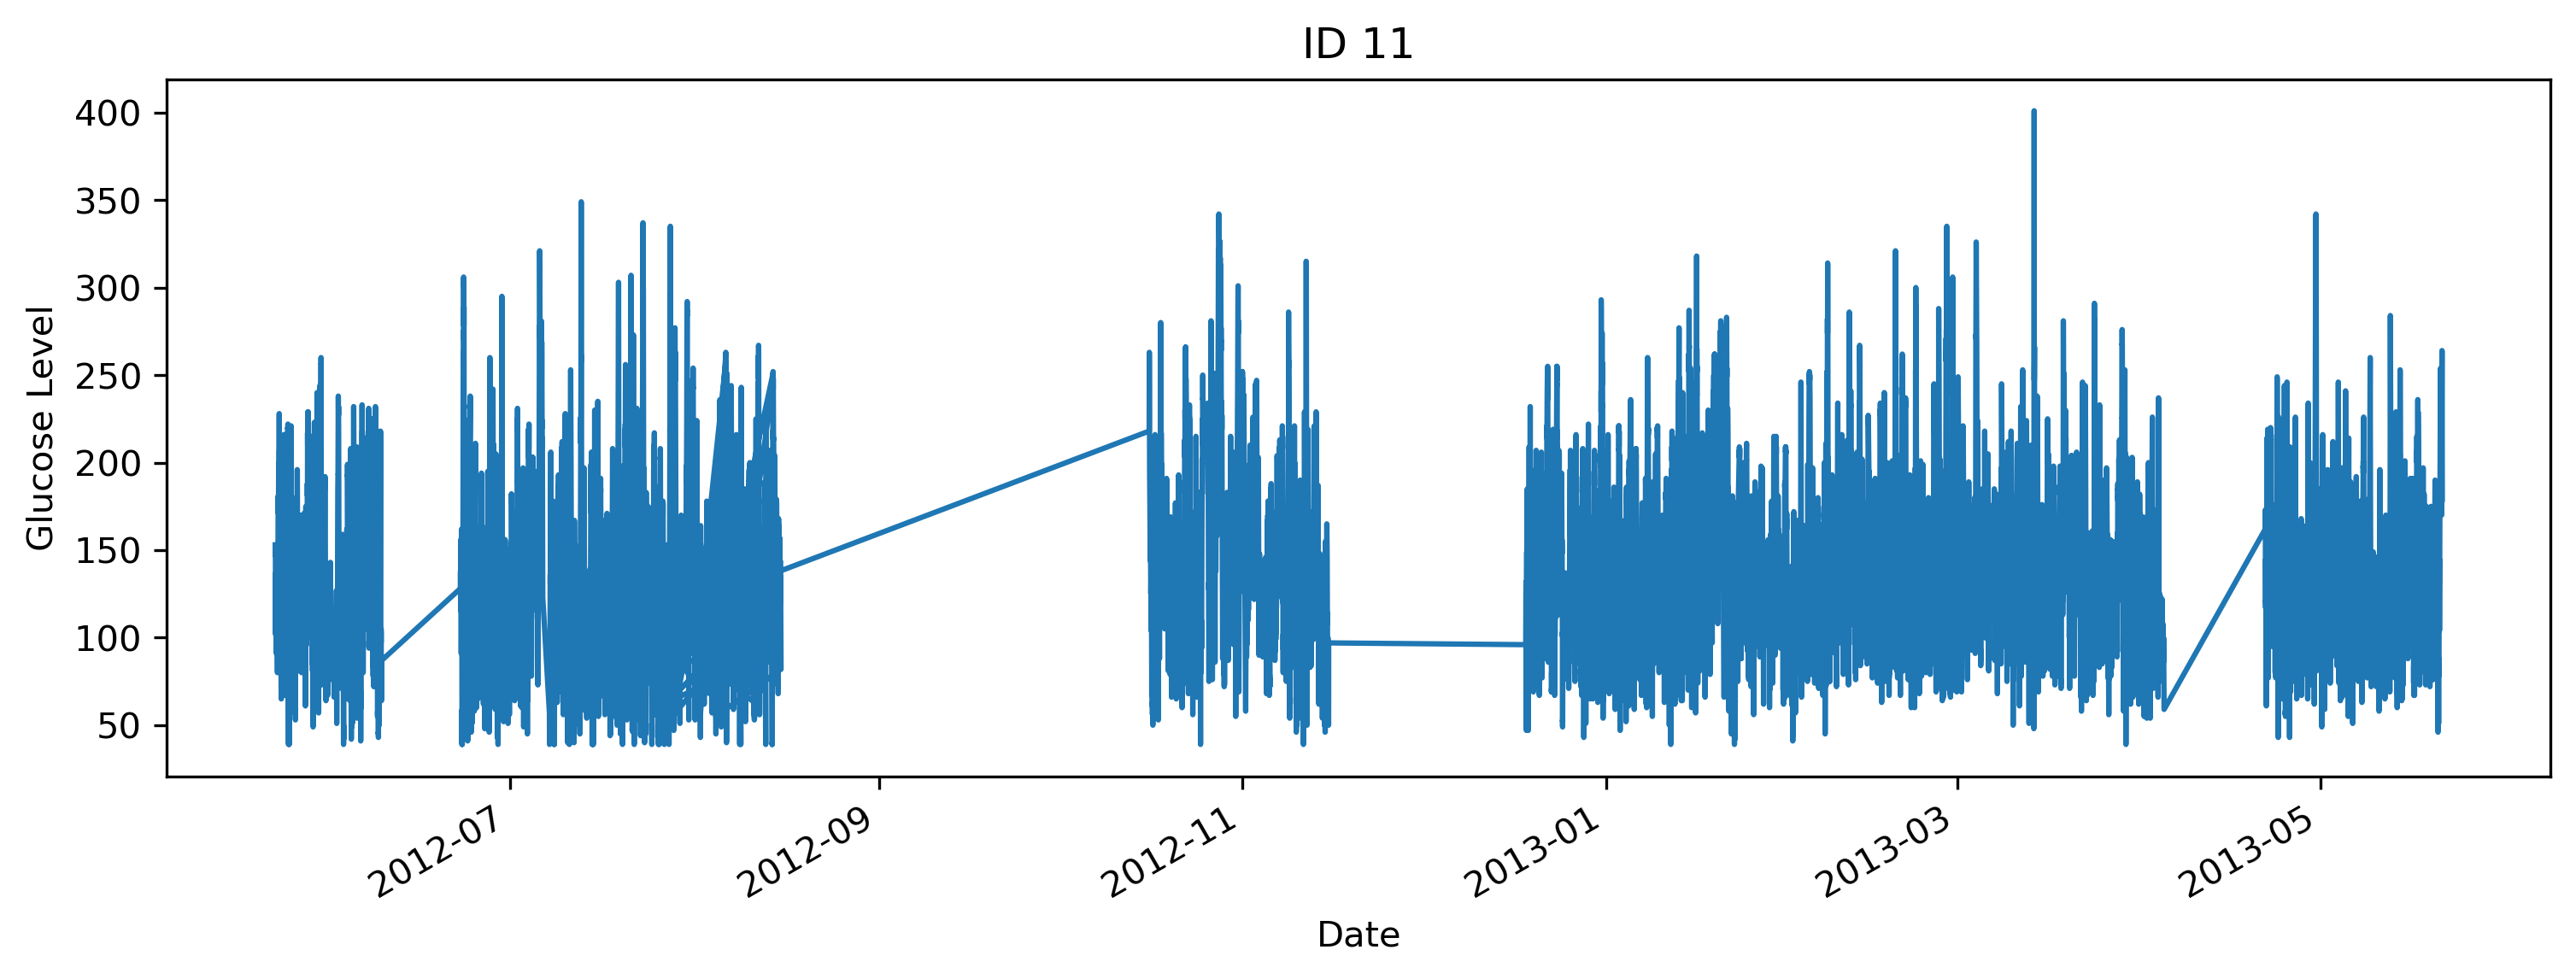

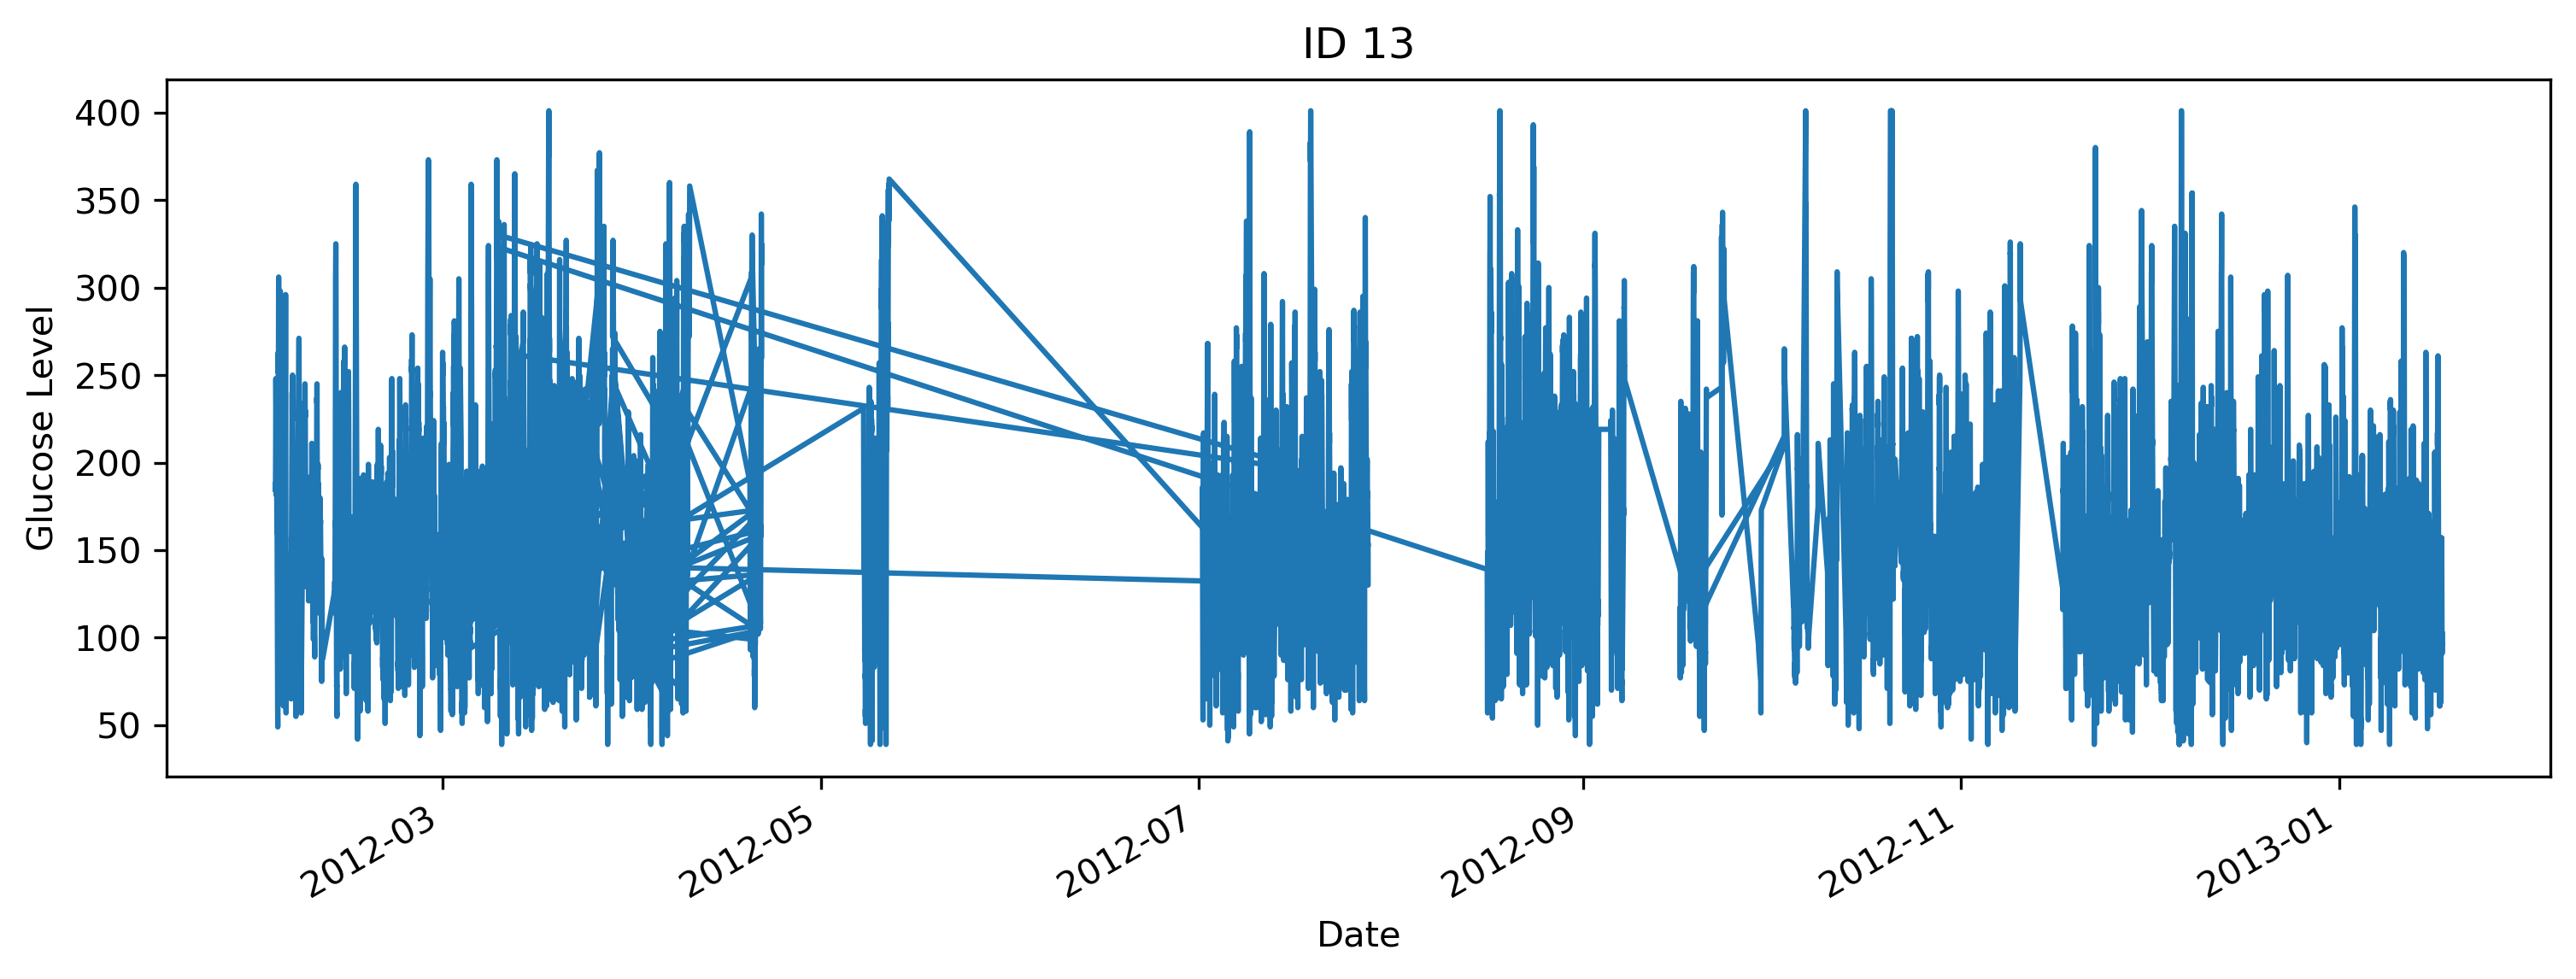

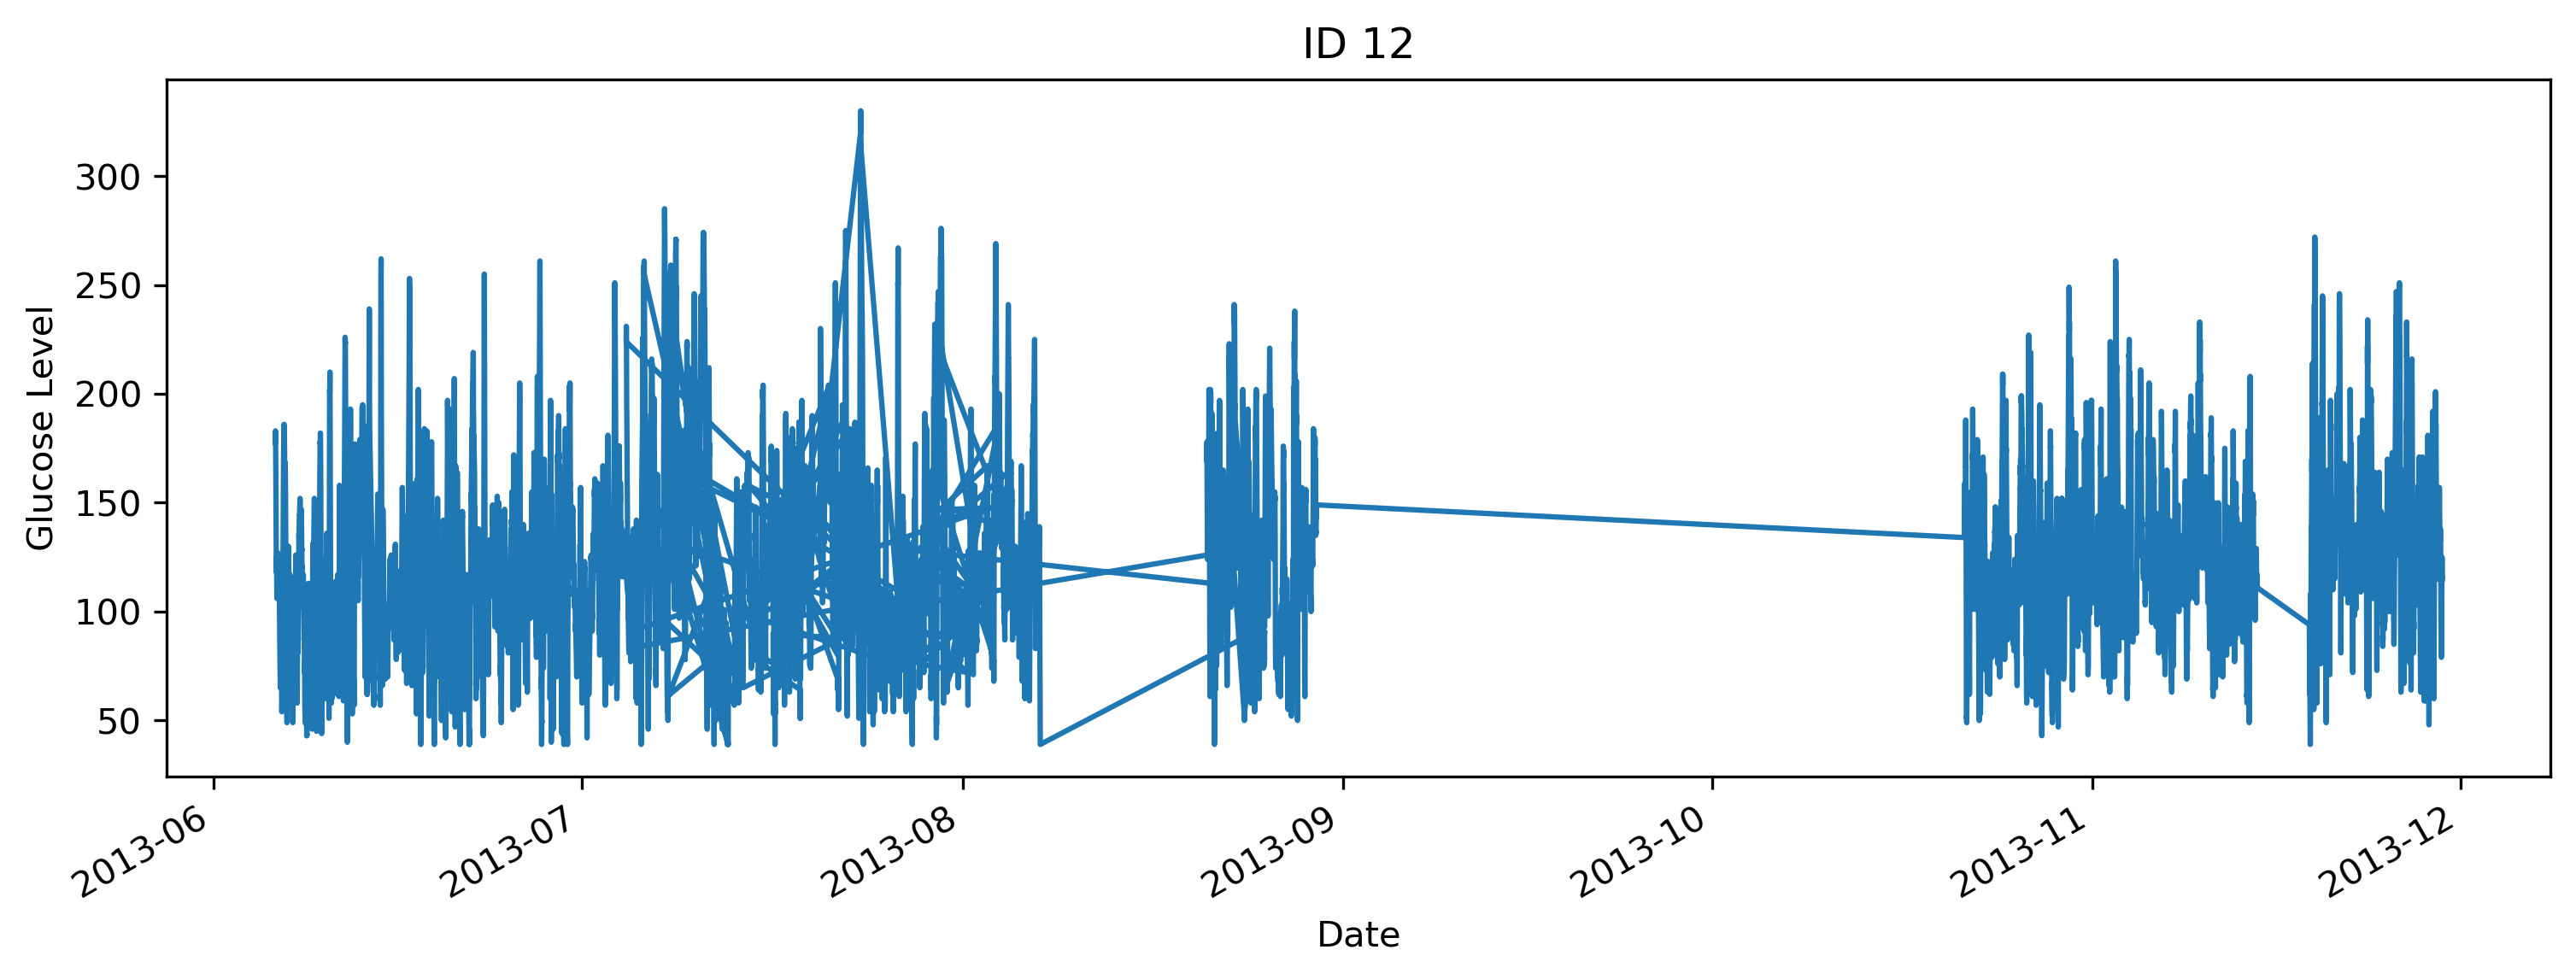

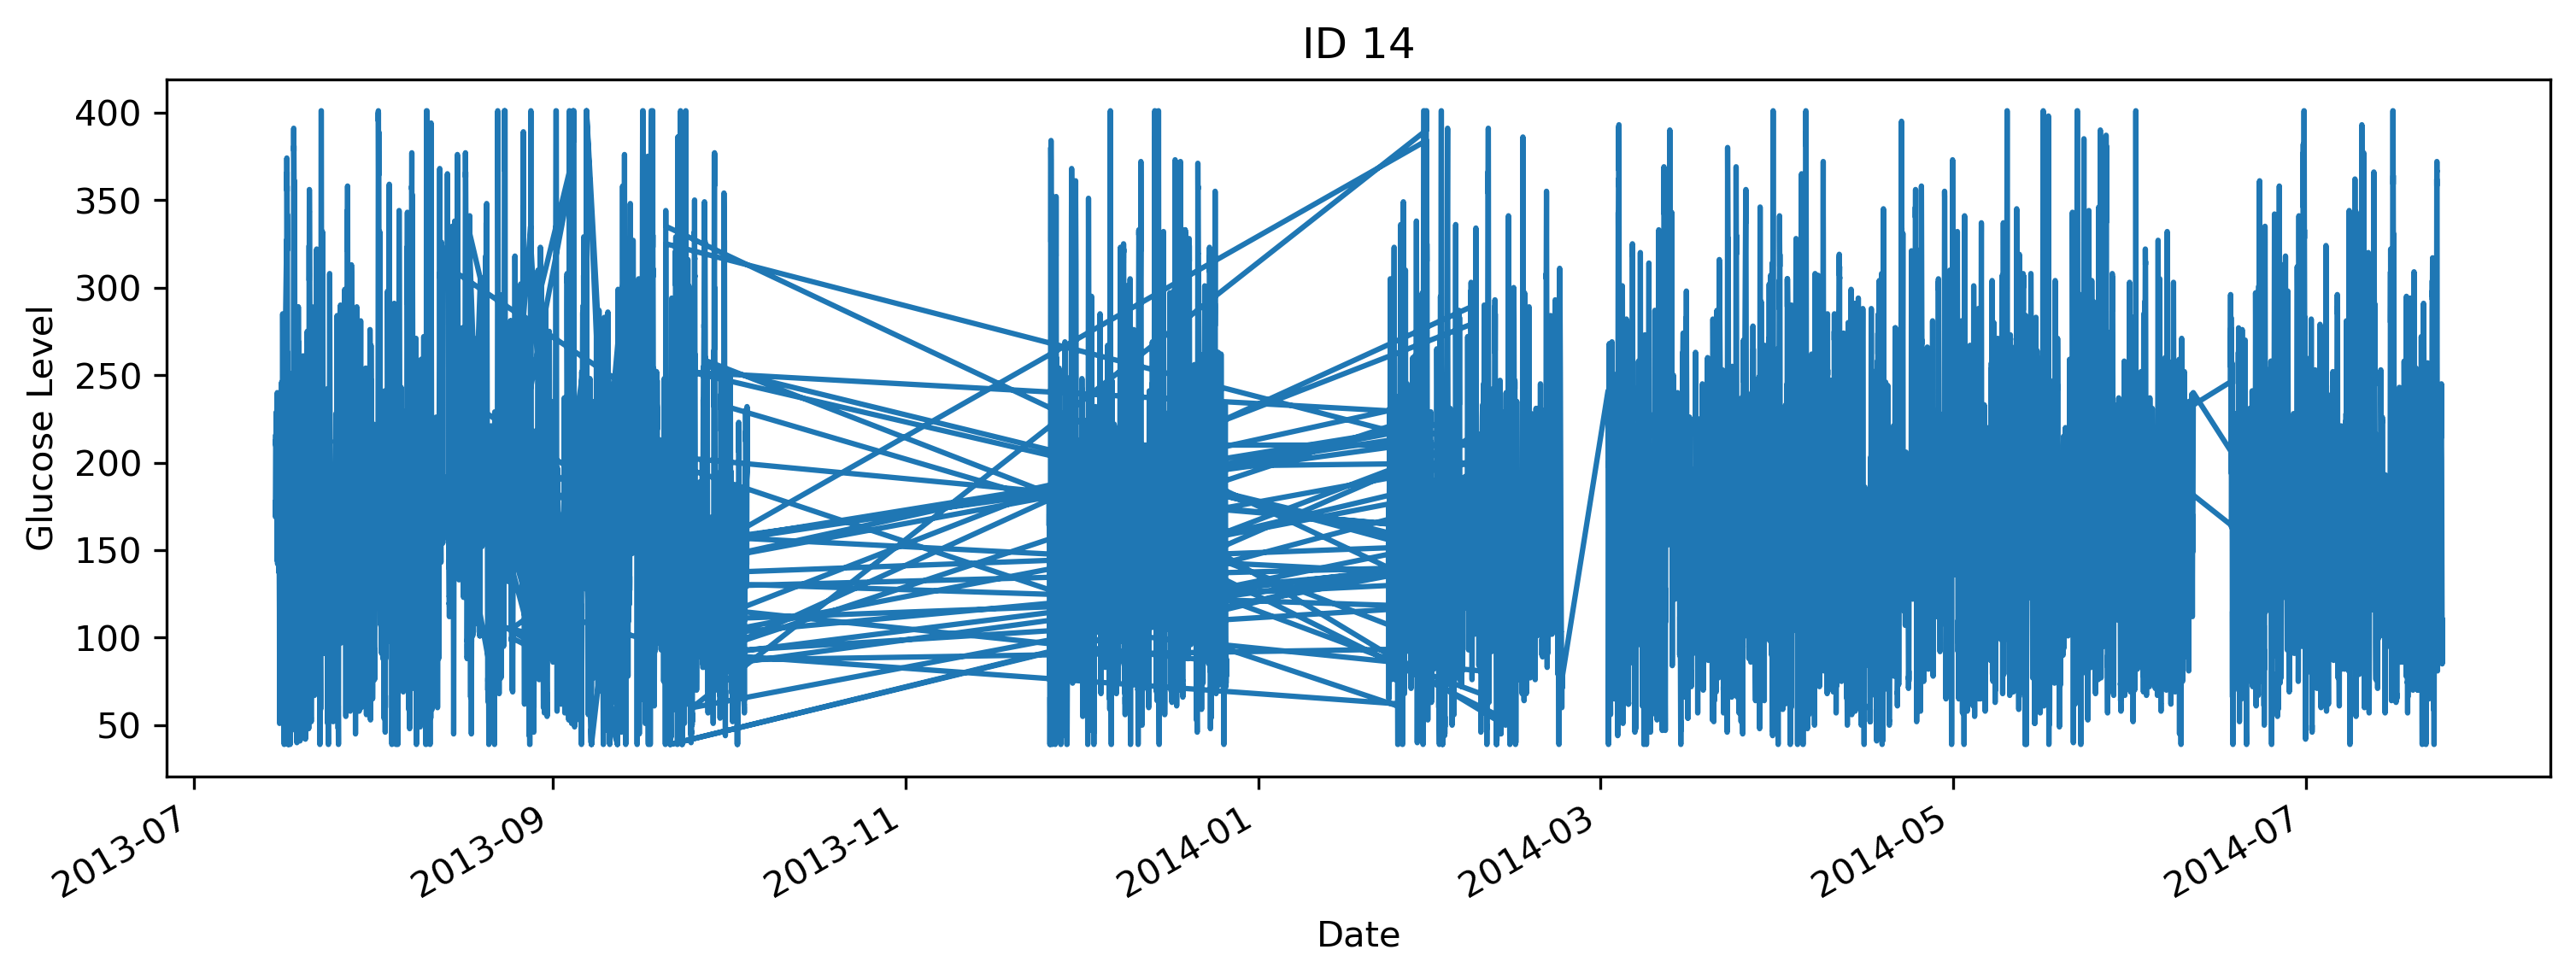

In [ ]:
# Plot by ID
for ID in IDs:
    x = subj_data[ID].time # Time for x-axis
    y = subj_data[ID].gl # Glucose for y-axis

    fig, ax = plt.subplots(figsize = (12,4), dpi = 300)
    ax.plot(x, y)
    plt.title("ID " + ID)
    plt.xlabel("Date")
    plt.ylabel("Glucose Level")
    
    fig.autofmt_xdate() # slant x-axis
    plt.show()